In [2]:
# pip install -r requirements.txt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

In [4]:
frequency_train_path = "Train Data/Train Data Zip/frequency_domain_features_train.csv"
time_train_path = "Train Data/Train Data Zip/time_domain_features_train.csv"
non_linear_path = "Train Data/Train Data Zip/heart_rate_non_linear_features_train.csv"

In [5]:
frequency_train = pd.read_csv(frequency_train_path)
time_train = pd.read_csv(time_train_path)
non_linear_train = pd.read_csv(non_linear_path)

In [6]:
frequency_train.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [7]:
time_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [8]:
non_linear_train.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [9]:
len(time_train)

369289

In [10]:
time_frequency_train = pd.merge(time_train, frequency_train, on='uuid', how='outer')

In [11]:
df_train = pd.merge(time_frequency_train, non_linear_train, on='uuid', how='outer')

In [12]:
df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
0,708.415823,710.497445,34.214847,9.316828,9.316699,3.672371,84.899885,0.533333,0.000000,0.587088,...,14.506349,645.381681,5.893533,0.169677,6.590099,47.936229,2.132870,1.335688,2,no stress
1,795.624286,800.263000,67.075024,13.417143,13.417129,4.999203,75.952485,6.266667,0.000000,0.489019,...,1.987937,2770.254734,49.303415,0.020283,9.490509,94.382455,2.137044,1.146100,2,no stress
2,810.270806,813.604545,62.629176,19.341399,19.341333,3.238089,74.507659,22.133333,0.000000,-0.189207,...,3.881731,2231.433471,24.761702,0.040385,13.680952,87.508050,2.199522,1.292180,2,no stress
3,989.444276,989.688385,132.938017,19.044447,19.043122,6.980408,61.788720,16.666667,1.600000,-0.382627,...,0.354593,4558.182444,281.013255,0.003559,13.470014,187.519576,2.181338,1.134392,2,interruption
4,581.133174,534.580390,143.186942,19.144927,19.144030,7.479106,108.561951,15.266667,2.466667,1.763236,...,19.117852,6932.902120,4.230713,0.236367,13.541391,202.043638,1.827347,1.224797,2,no stress


In [13]:
len(df_train)

369289

In [14]:
df_train.isna().any().any()

np.False_

In [15]:
len(df_train.columns)

37

In [16]:
df_train['condition'].value_counts()

condition
no stress        200082
interruption     105150
time pressure     64057
Name: count, dtype: int64

In [17]:
print(df_train.dtypes)

MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
HR                   float64
pNN25                float64
pNN50                float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR          float64
SKEW_REL_RR          float64
uuid                  object
VLF                  float64
VLF_PCT              float64
LF                   float64
LF_PCT               float64
LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
TP                   float64
LF_HF                float64
HF_LF                float64
SD1                  float64
SD2                  float64
sampen               float64
higuci        

In [18]:
df_train.drop(columns=['uuid', 'datasetId'], inplace=True)

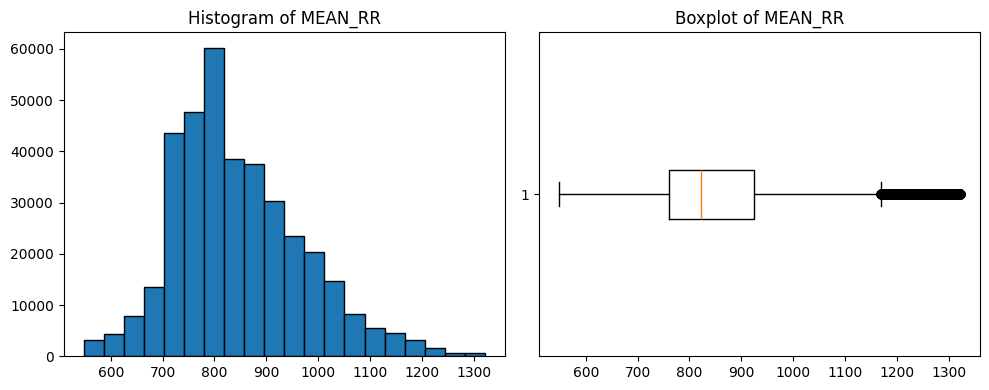

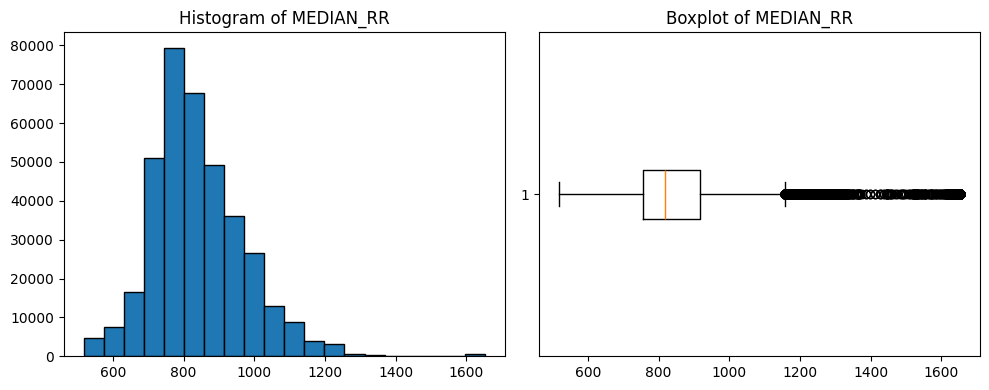

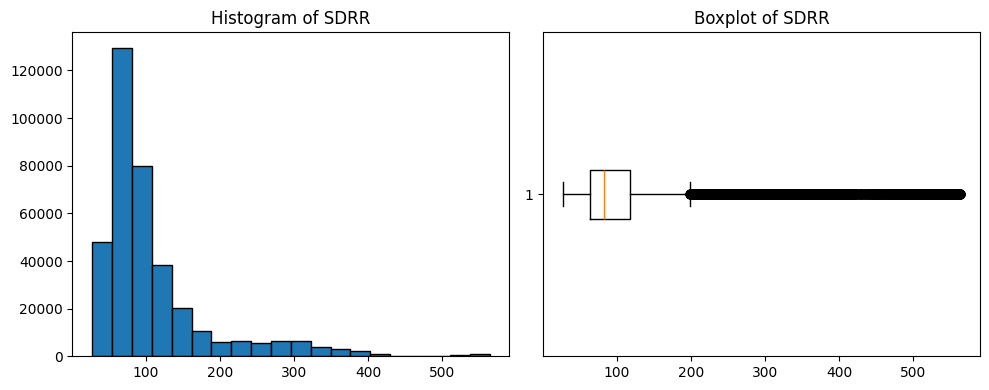

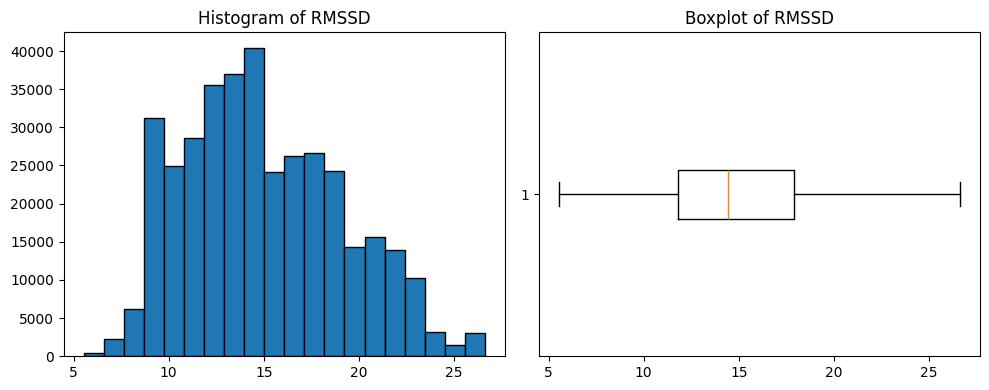

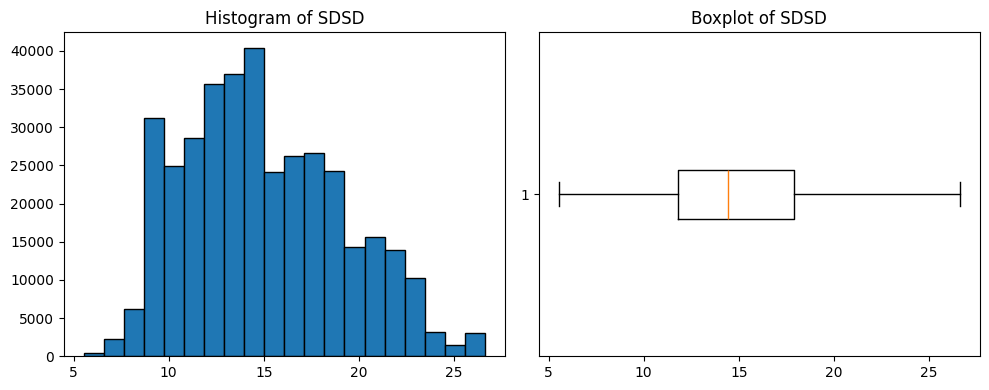

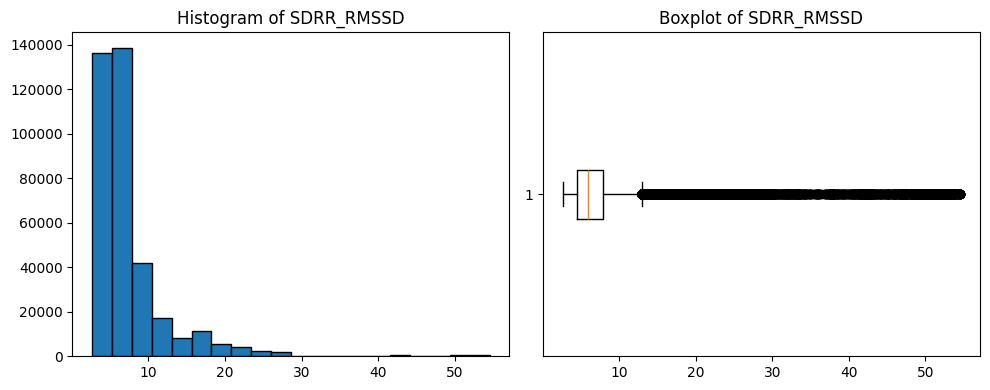

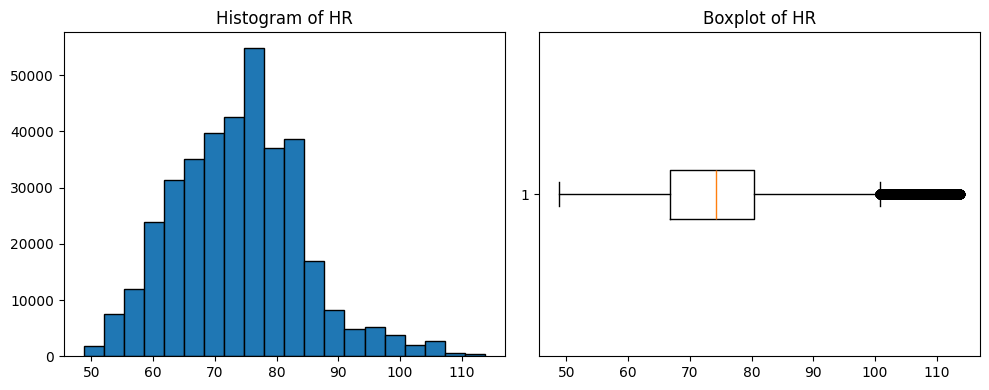

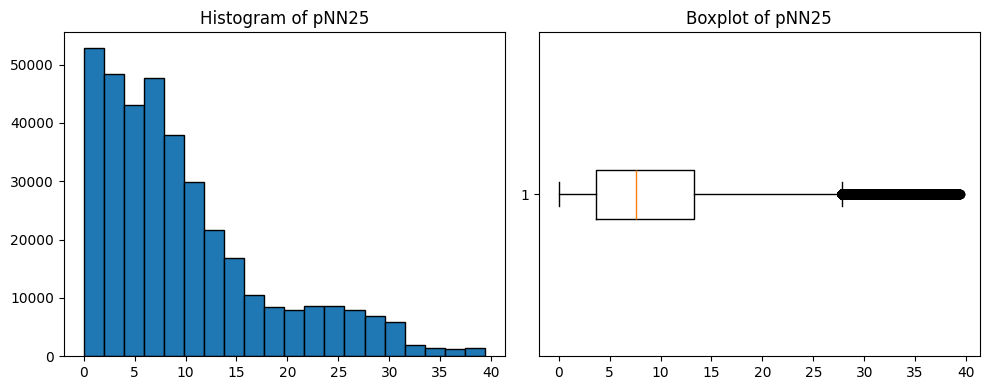

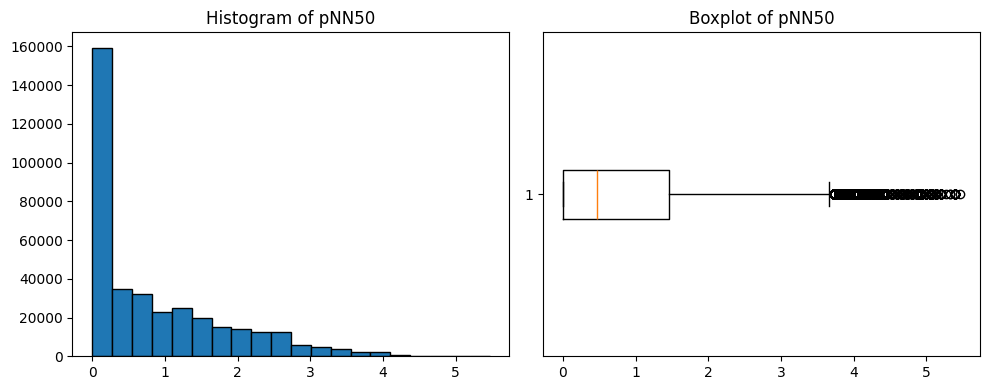

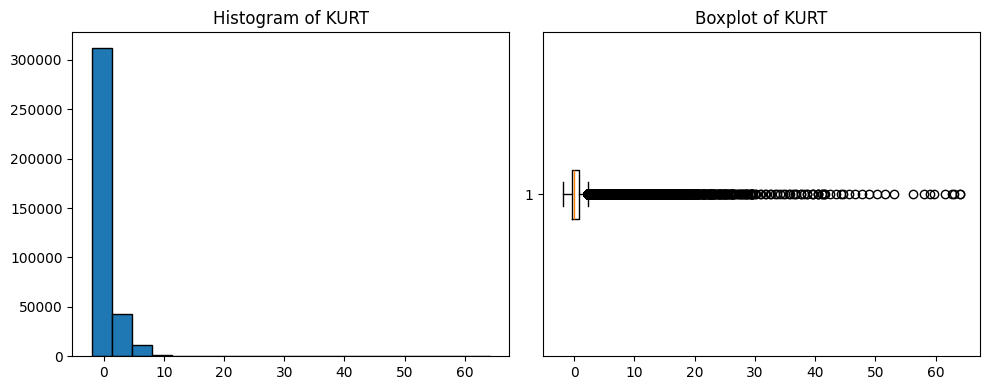

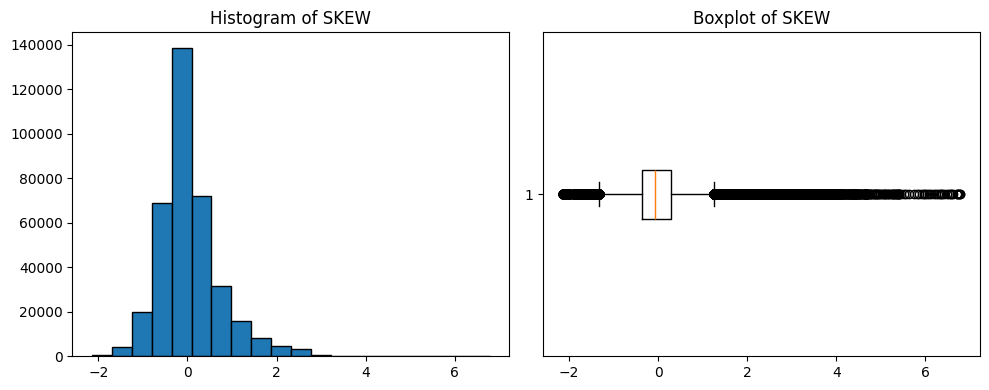

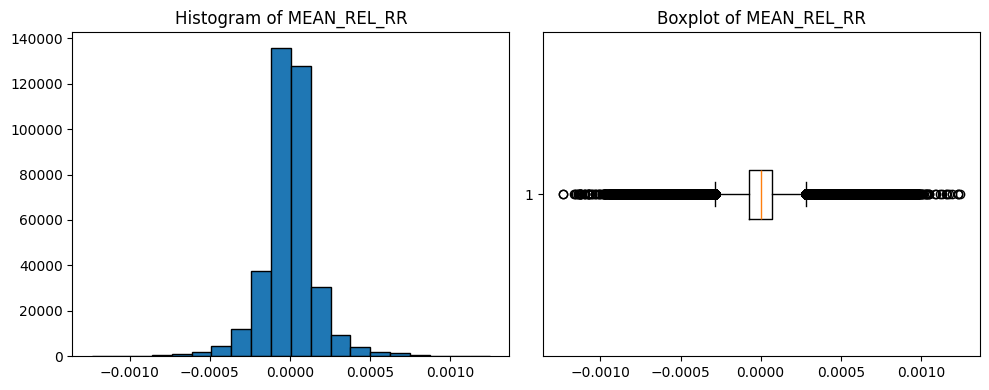

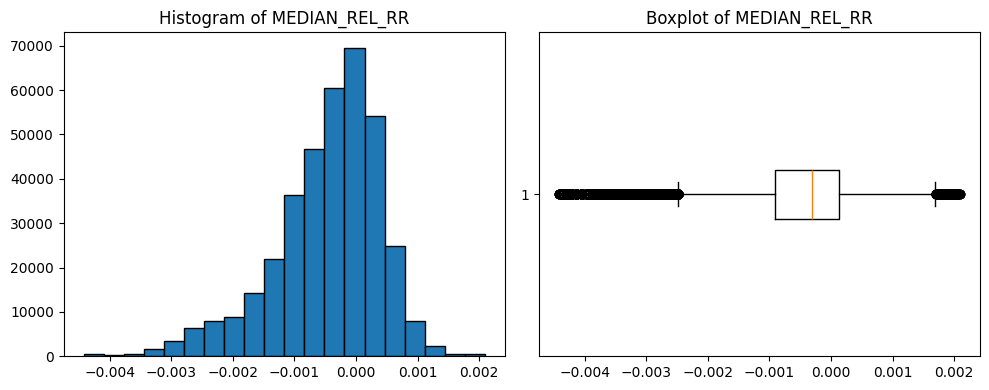

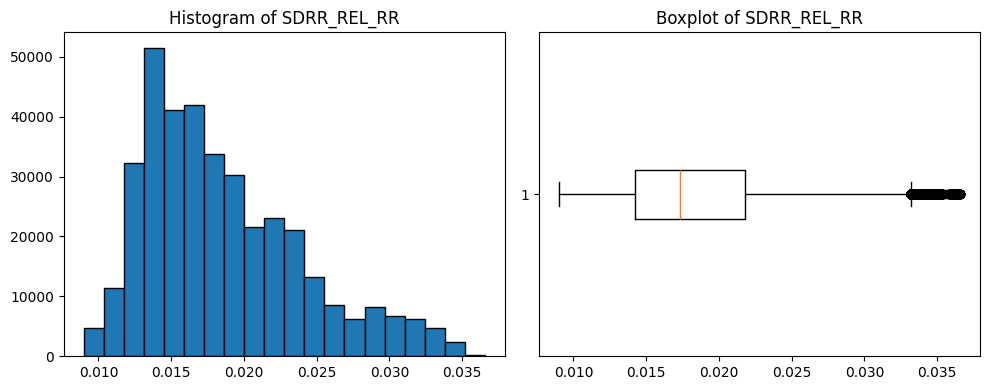

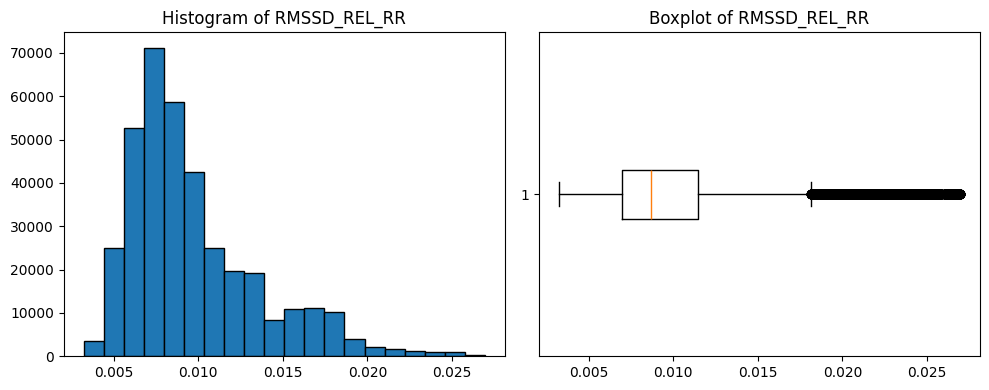

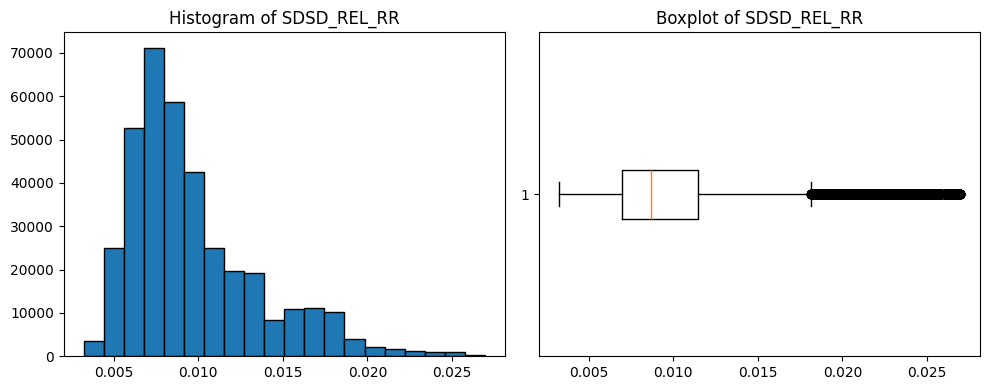

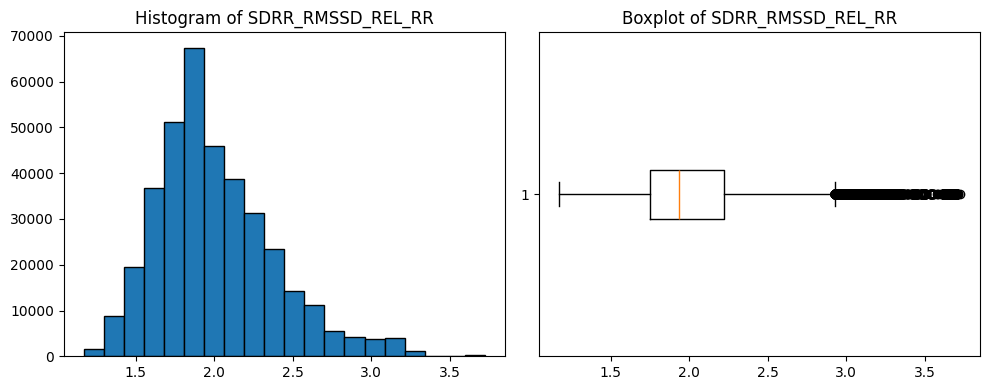

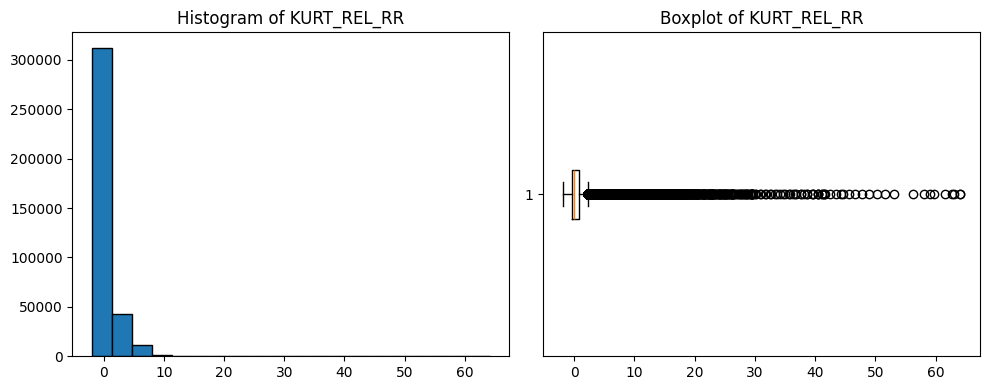

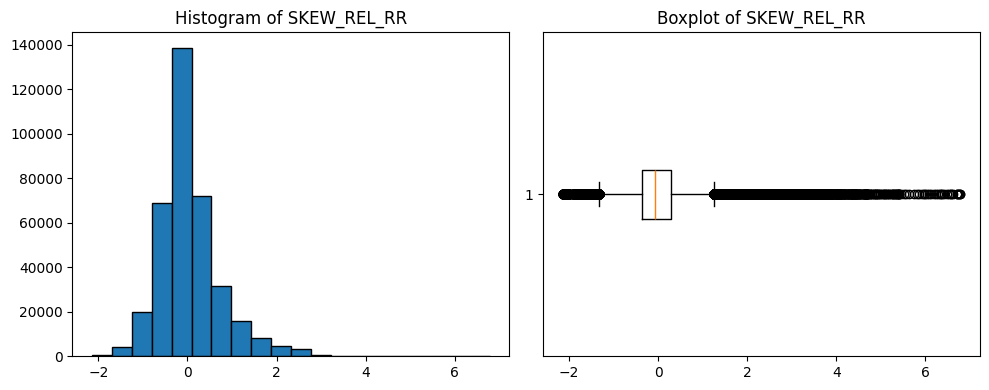

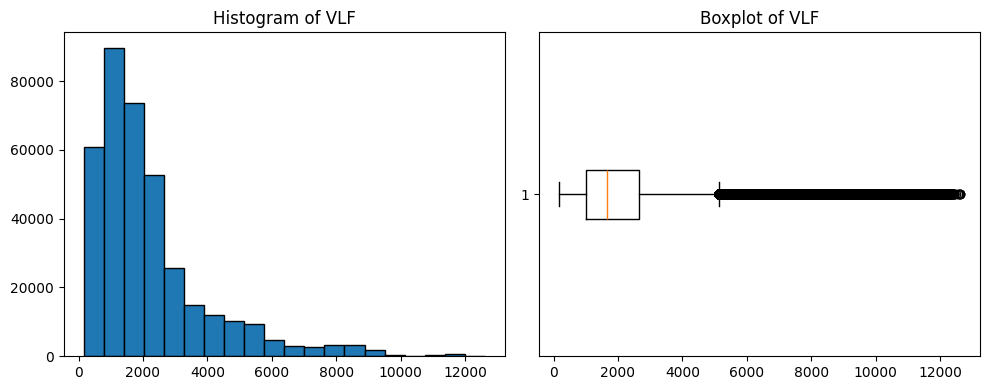

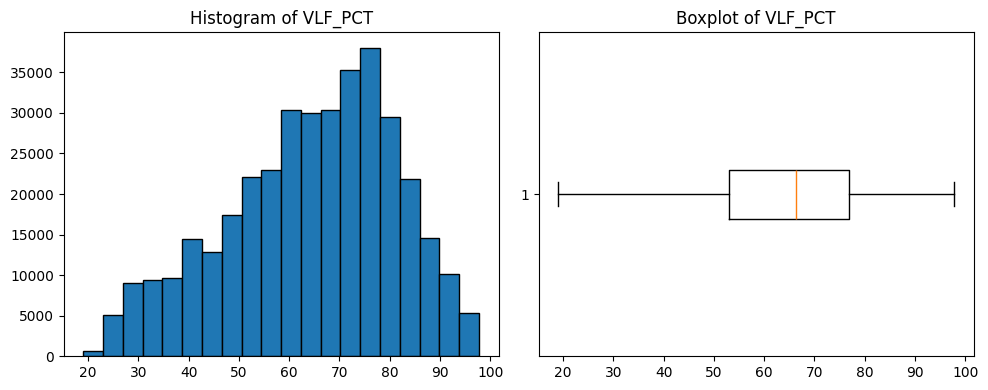

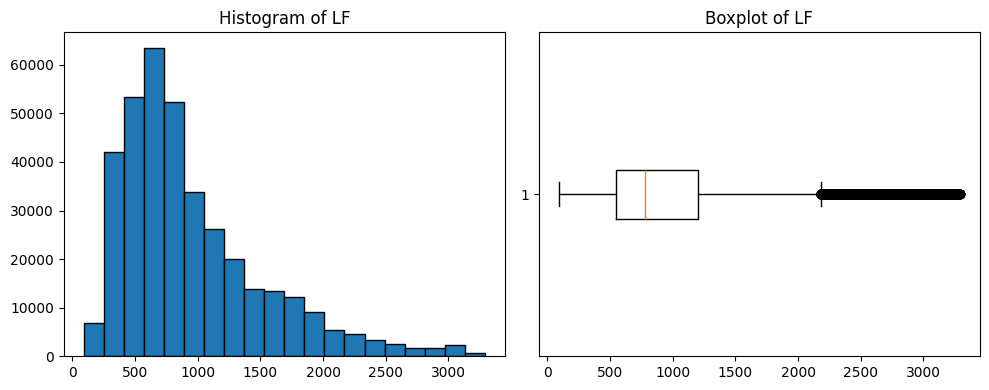

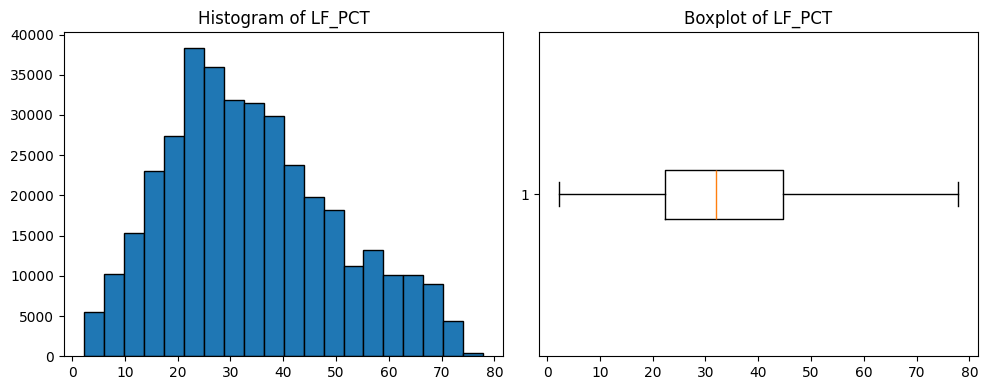

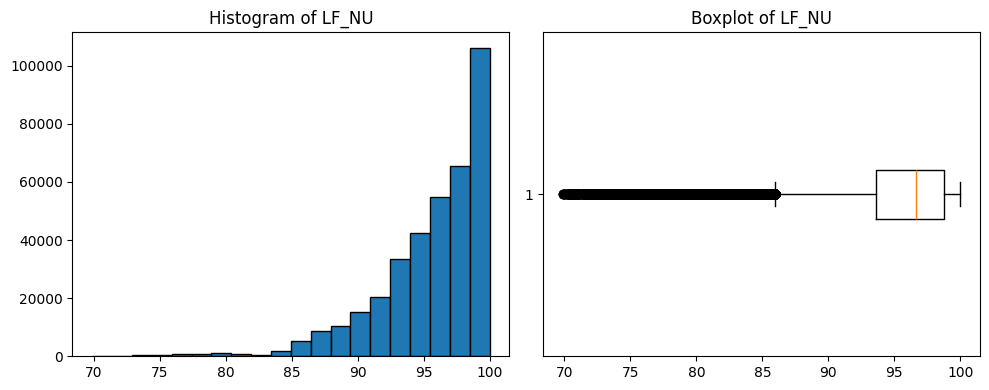

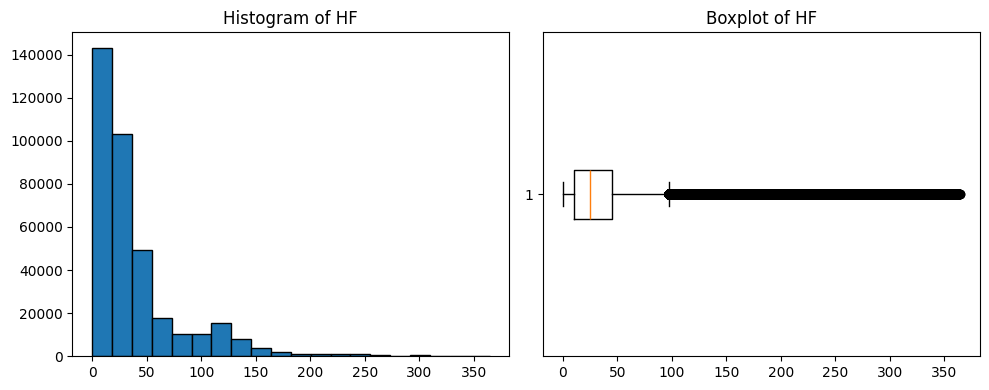

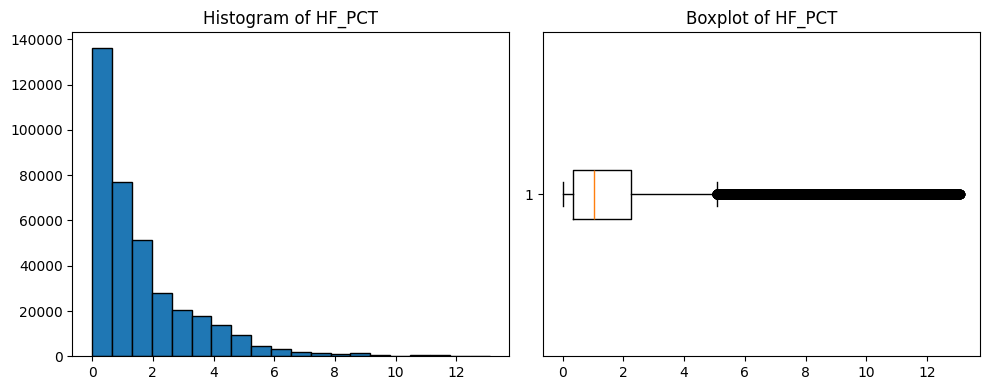

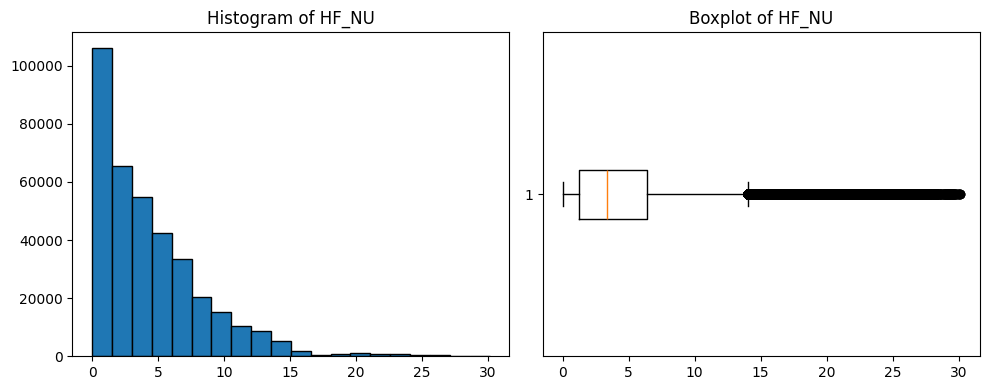

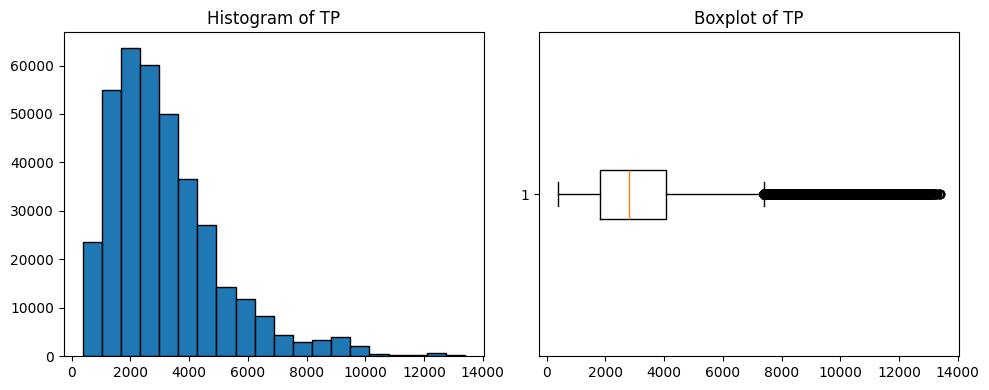

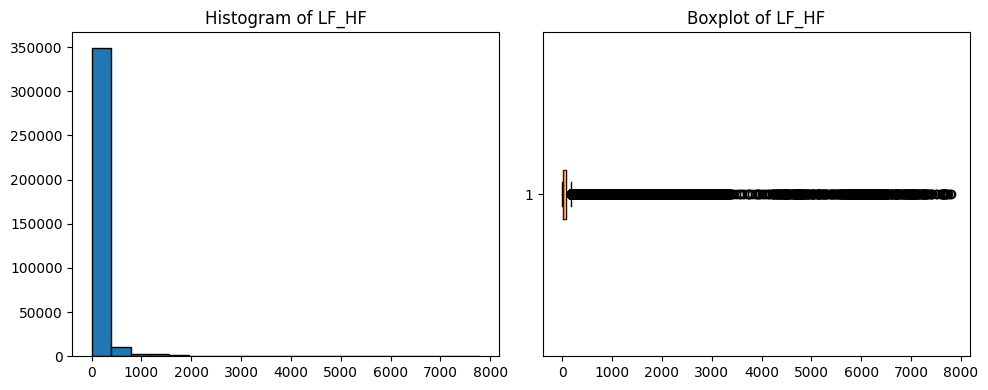

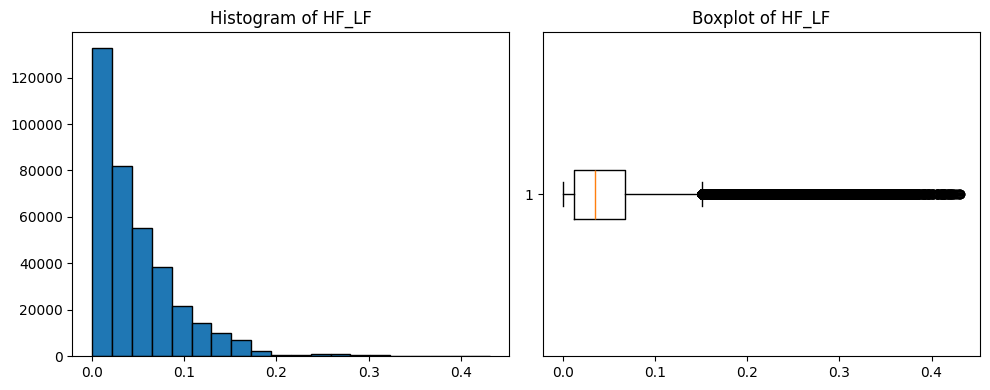

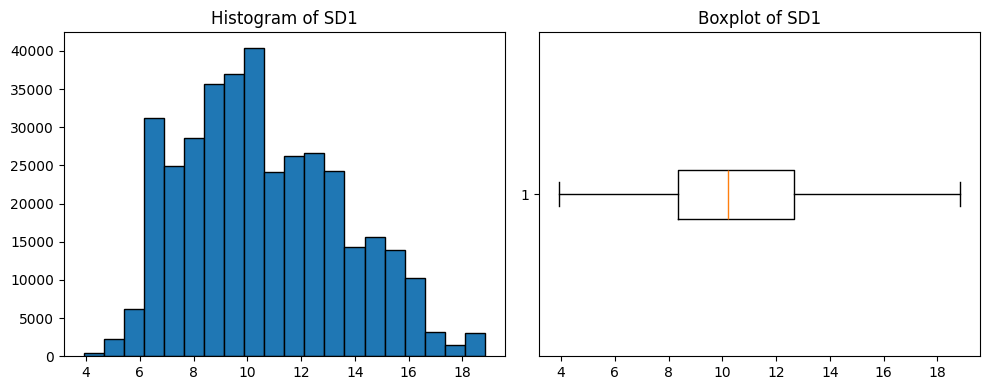

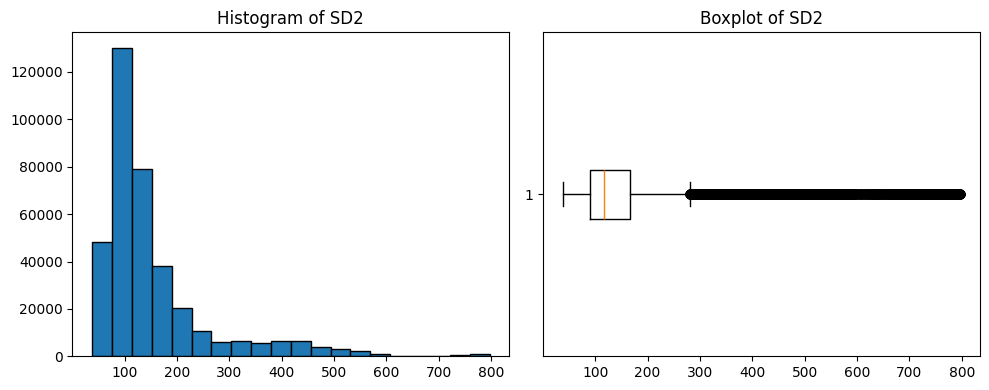

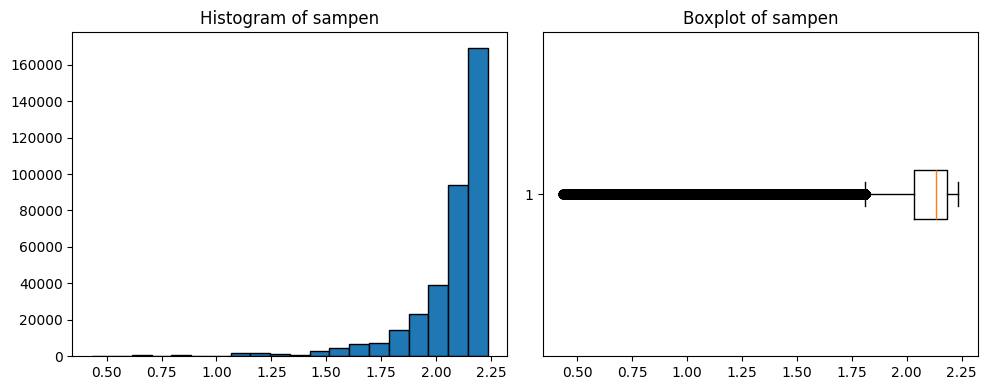

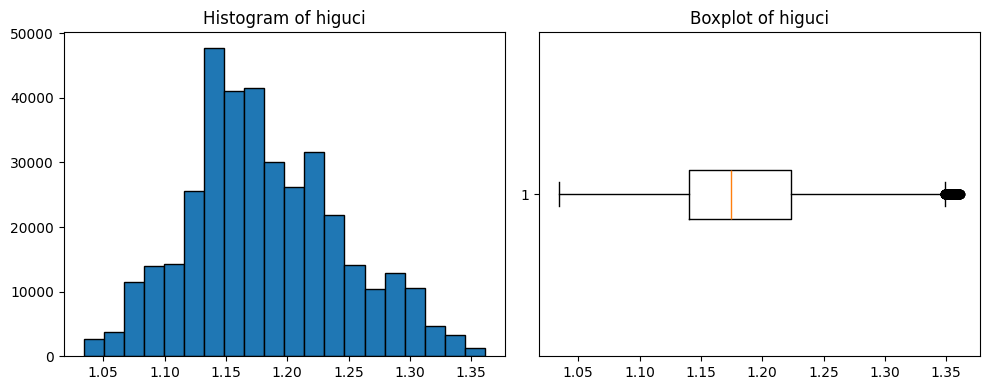

In [19]:
for d in df_train.columns:
    if d == 'condition': break
        
    data = df_train[d].dropna()

    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=20, edgecolor='black')
    plt.title(f'Histogram of {d}')

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(data, vert=False)
    plt.title(f'Boxplot of {d}')

    plt.tight_layout()
    plt.show()

In [20]:
for d in df_train.columns:
    if d == 'condition': break
        
    values = df_train[d].dropna()  #not necessary for this dataset
    mean = np.mean(values)
    std = np.std(values, ddof=1)
    skewness = skew(values)

    print(f"{d}: μ={mean:.3f}, σ={std:.3f}, γ={skewness:.3f}")

MEAN_RR: μ=846.650, σ=124.604, γ=0.648
MEDIAN_RR: μ=841.966, σ=132.321, γ=0.926
SDRR: μ=109.353, σ=77.117, γ=2.364
RMSSD: μ=14.977, σ=4.121, γ=0.400
SDSD: μ=14.977, σ=4.121, γ=0.400
SDRR_RMSSD: μ=7.397, σ=5.144, γ=3.708
HR: μ=73.942, σ=10.337, γ=0.412
pNN25: μ=9.841, σ=8.196, γ=1.203
pNN50: μ=0.866, σ=0.990, γ=1.264
KURT: μ=0.523, σ=1.790, γ=5.722
SKEW: μ=0.042, σ=0.700, γ=1.223
MEAN_REL_RR: μ=-0.000, σ=0.000, γ=0.113
MEDIAN_REL_RR: μ=-0.000, σ=0.001, γ=-0.948
SDRR_REL_RR: μ=0.019, σ=0.005, γ=0.870
RMSSD_REL_RR: μ=0.010, σ=0.004, γ=1.259
SDSD_REL_RR: μ=0.010, σ=0.004, γ=1.259
SDRR_RMSSD_REL_RR: μ=2.007, σ=0.376, γ=0.839
KURT_REL_RR: μ=0.523, σ=1.790, γ=5.722
SKEW_REL_RR: μ=0.042, σ=0.700, γ=1.223
VLF: μ=2199.580, σ=1815.773, γ=1.961
VLF_PCT: μ=64.289, σ=16.775, γ=-0.411
LF: μ=946.530, σ=574.172, γ=1.349
LF_PCT: μ=34.095, σ=16.040, γ=0.425
LF_NU: μ=95.567, σ=4.123, γ=-1.646
HF: μ=39.246, σ=45.399, γ=2.477
HF_PCT: μ=1.616, σ=1.761, γ=2.022
HF_NU: μ=4.433, σ=4.123, γ=1.646
TP: μ=3185.356,

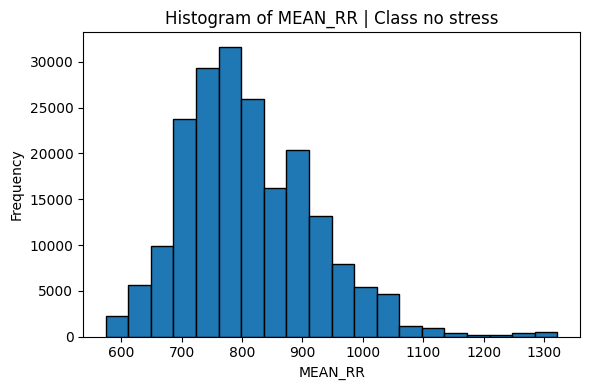

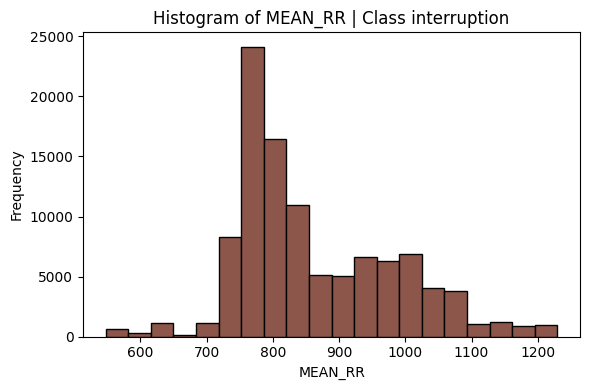

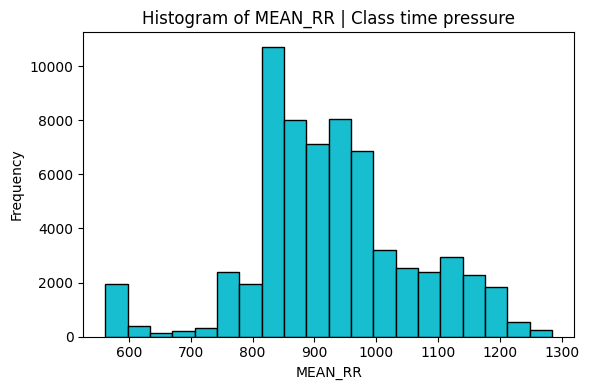

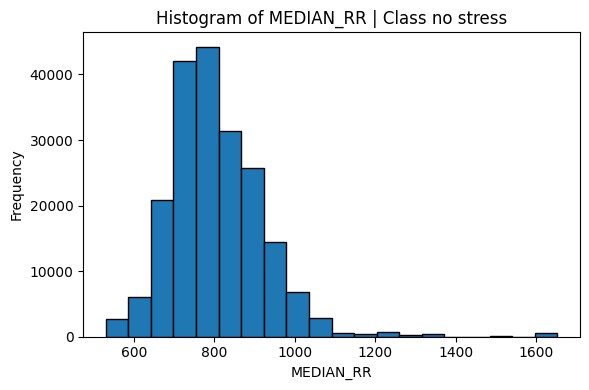

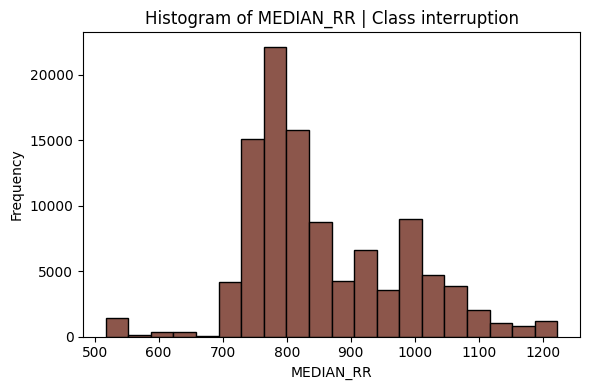

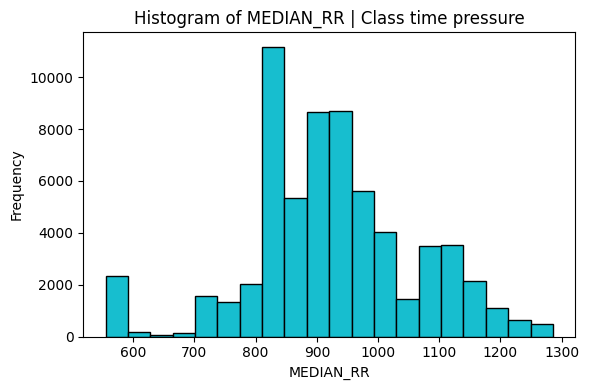

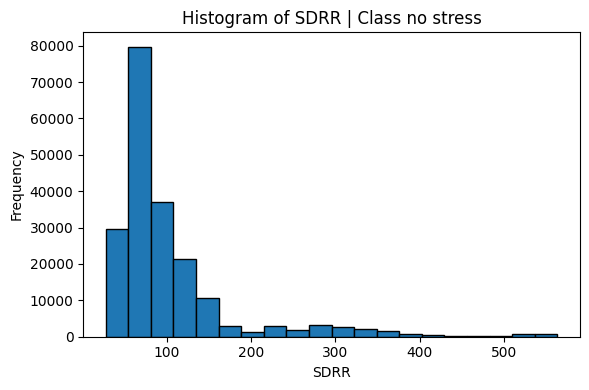

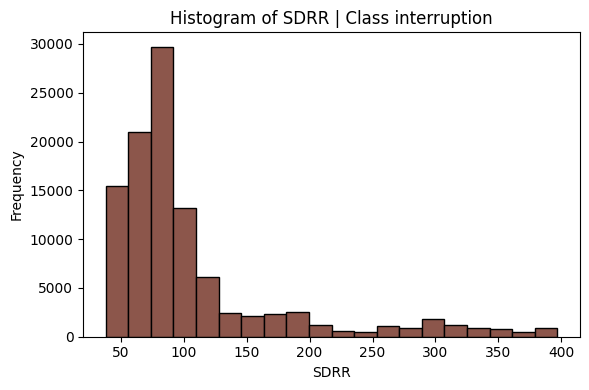

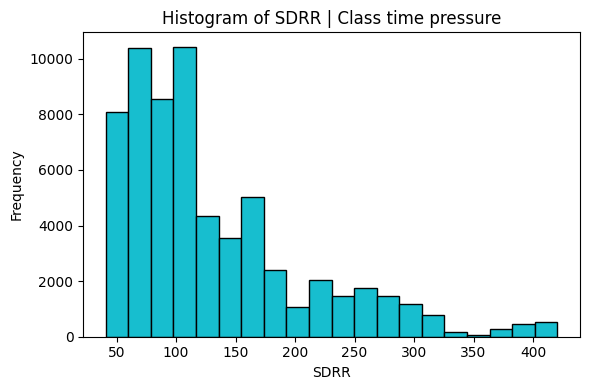

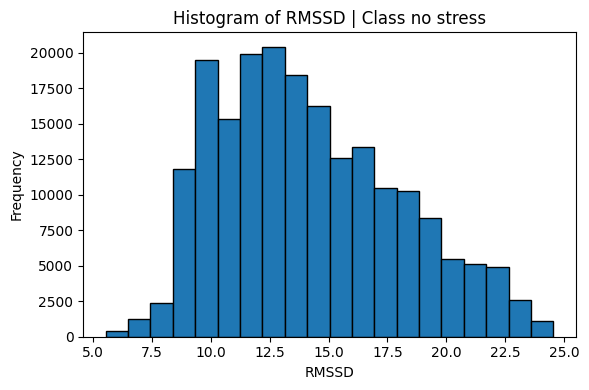

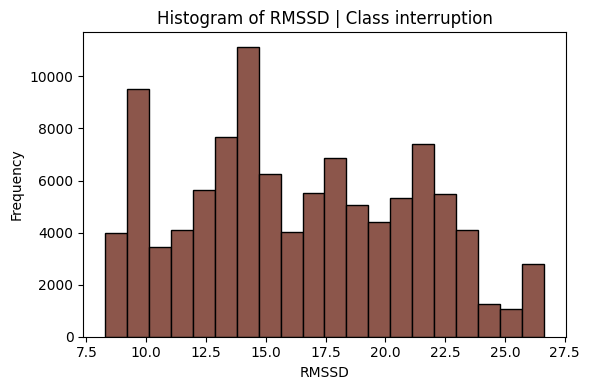

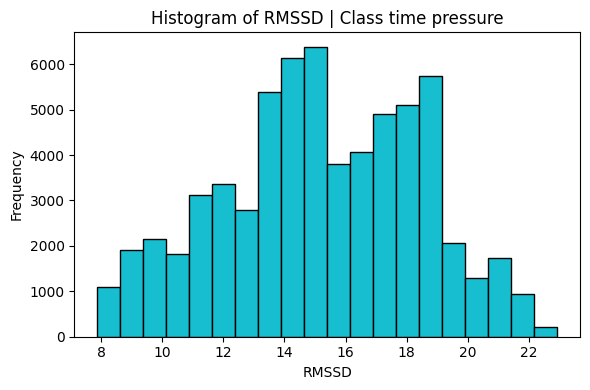

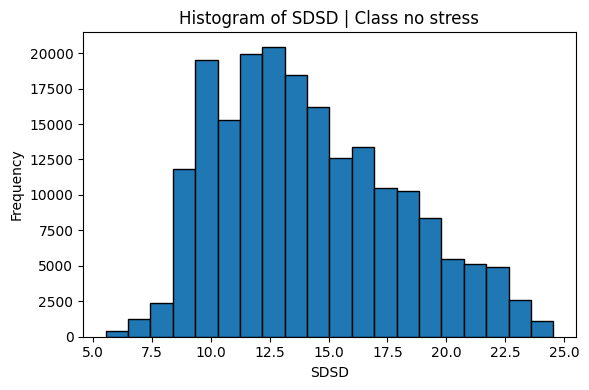

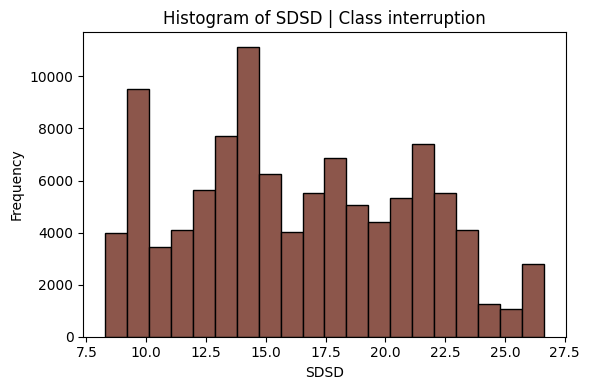

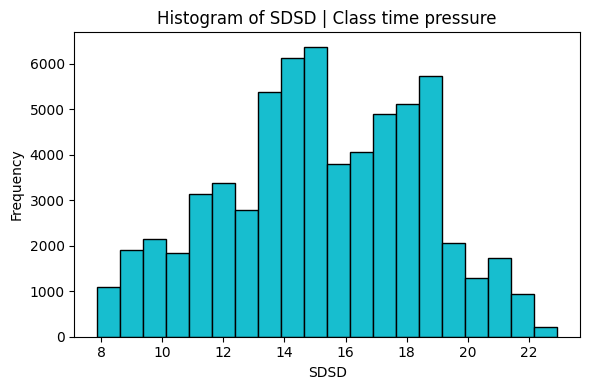

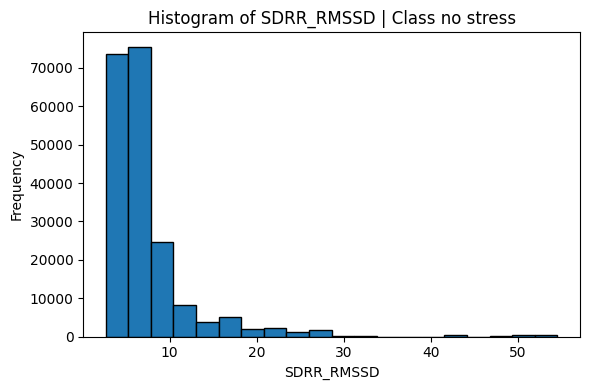

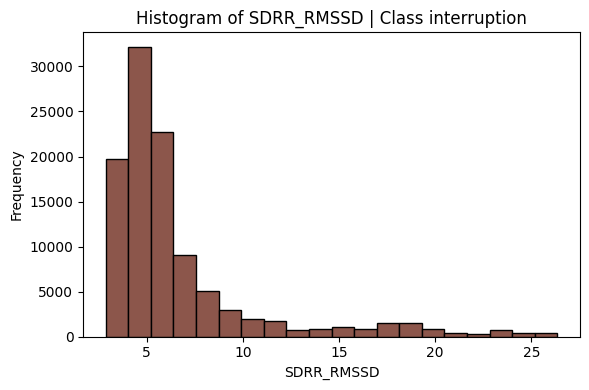

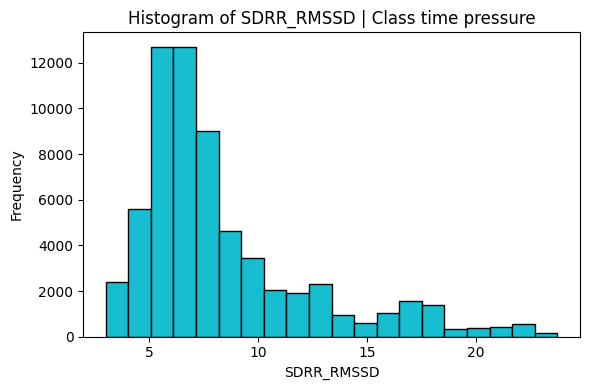

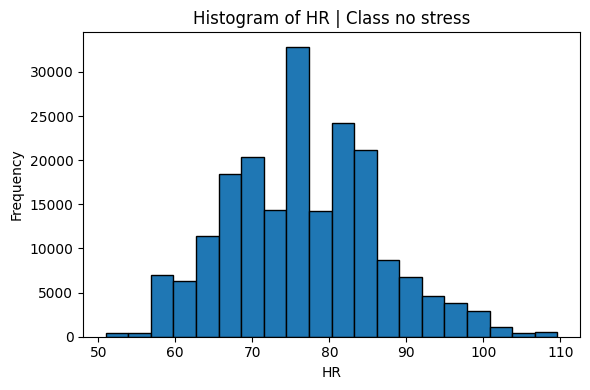

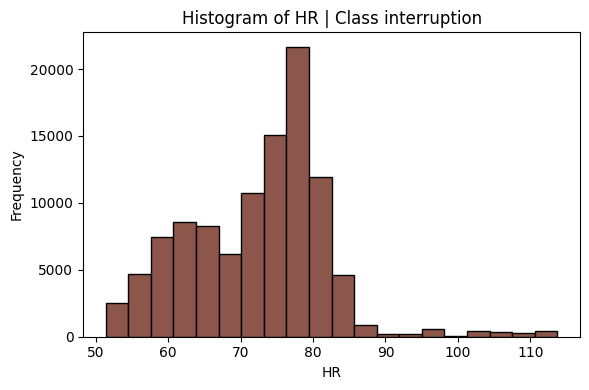

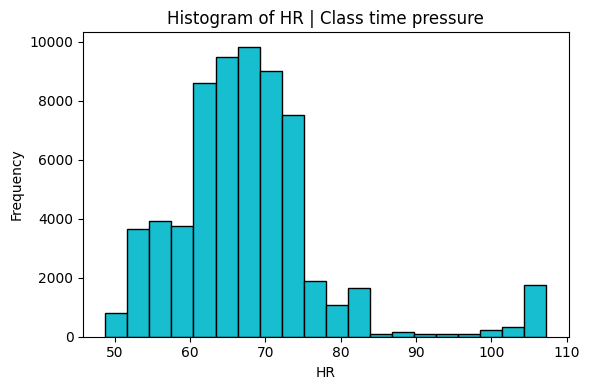

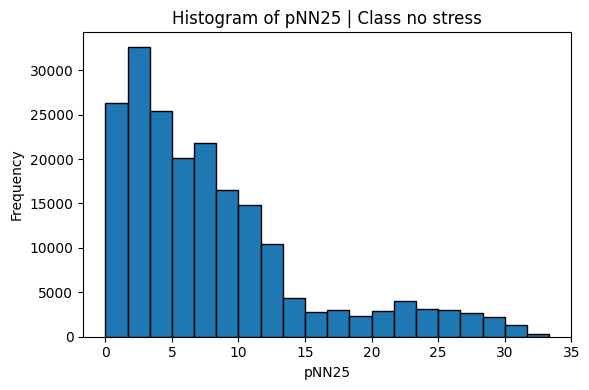

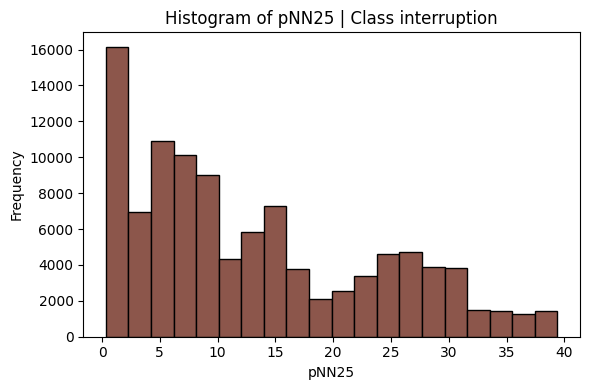

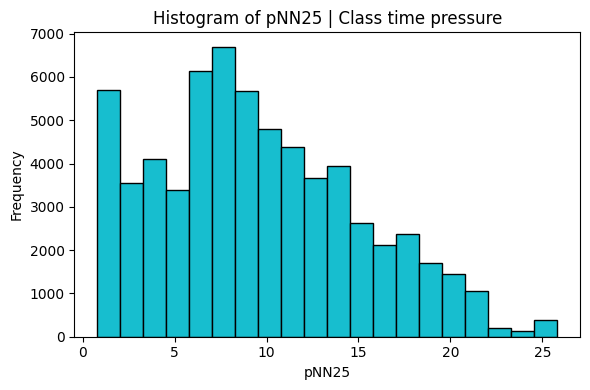

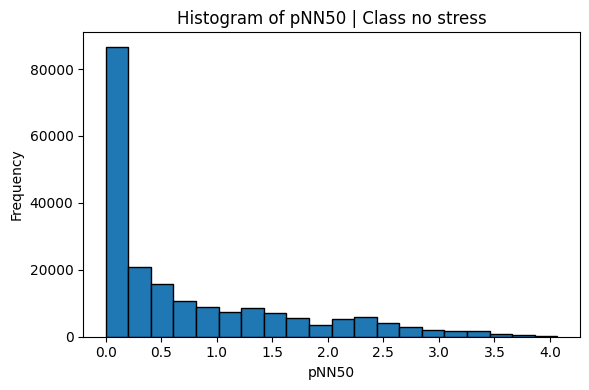

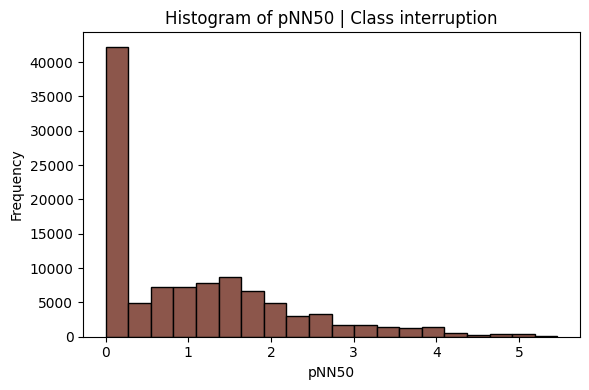

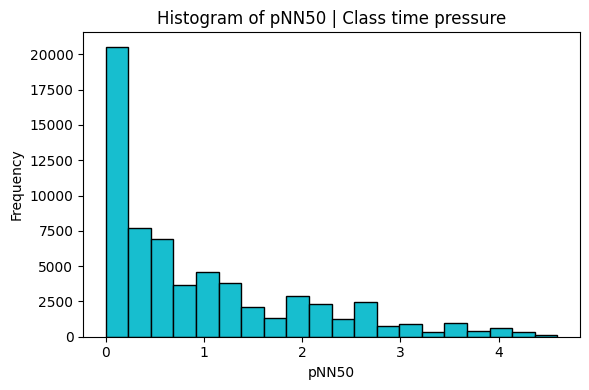

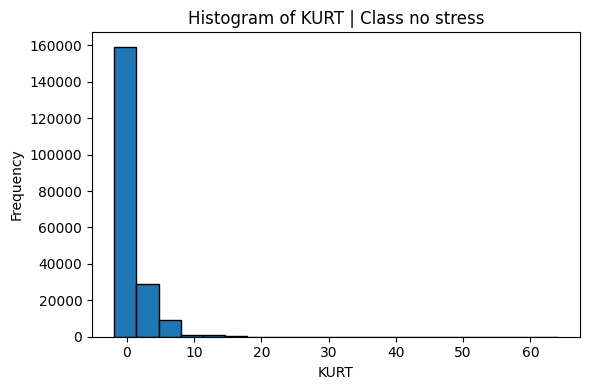

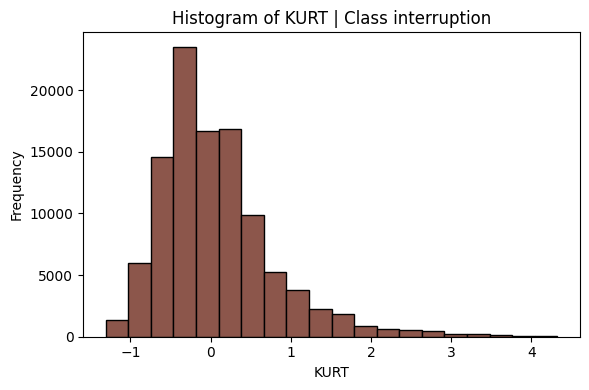

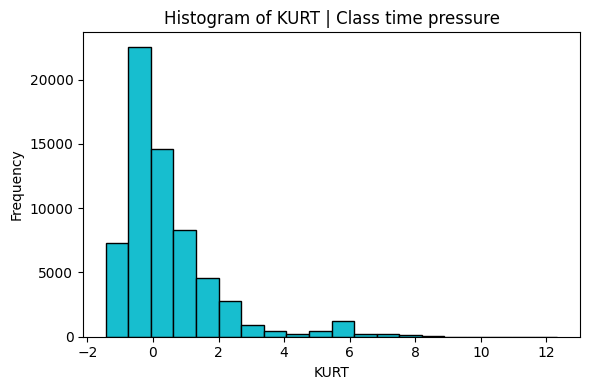

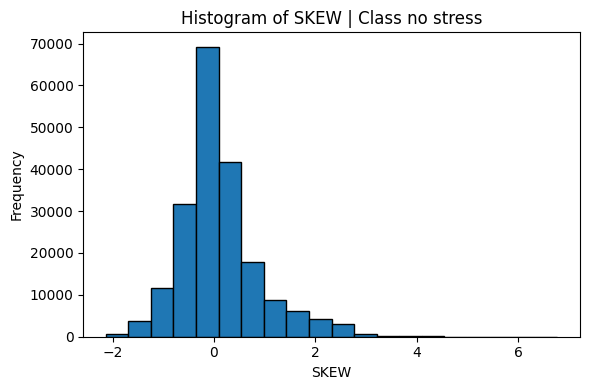

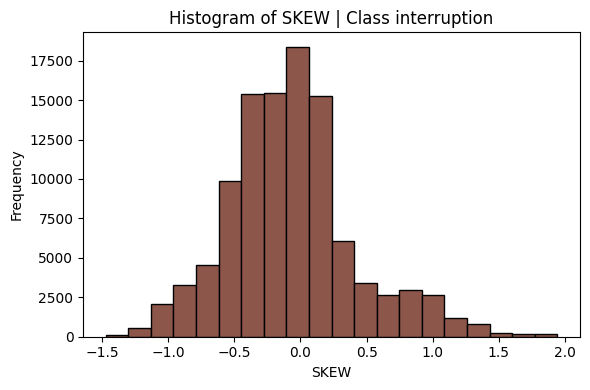

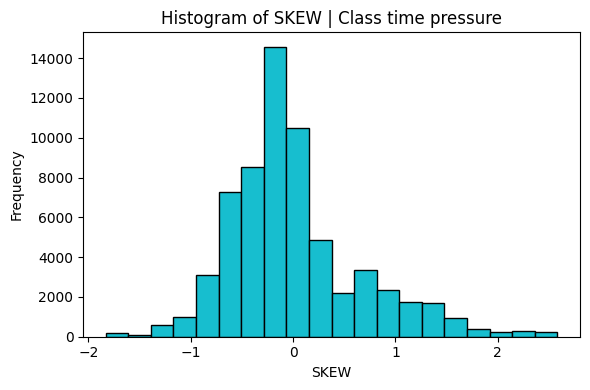

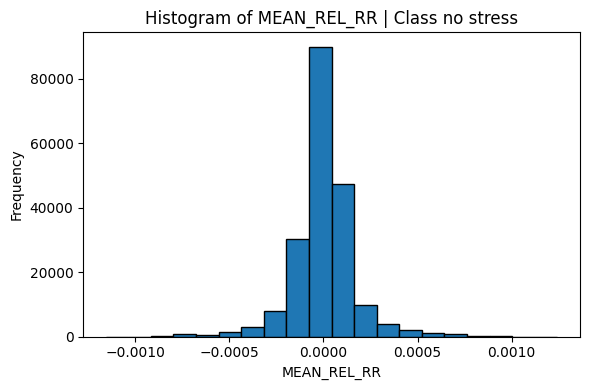

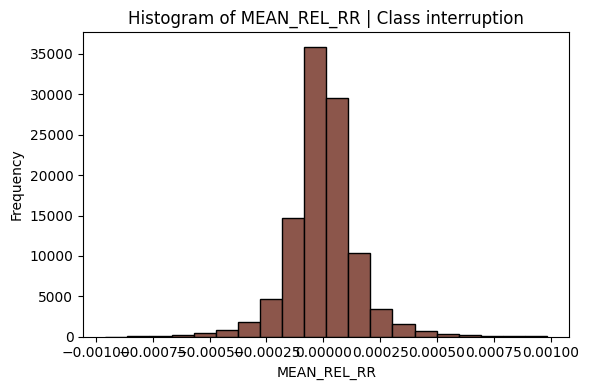

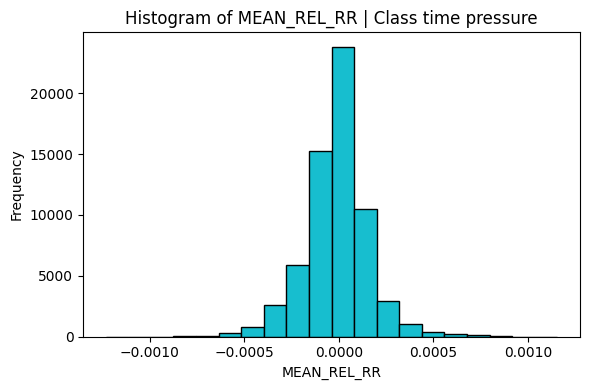

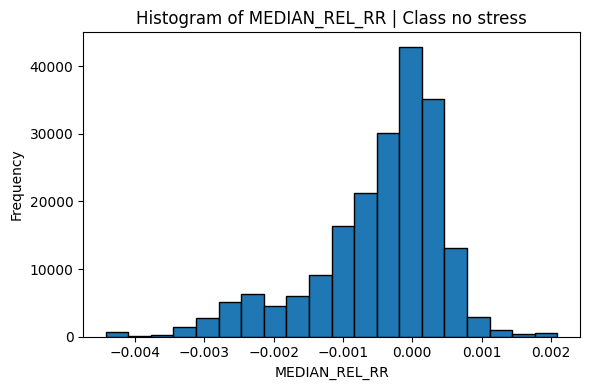

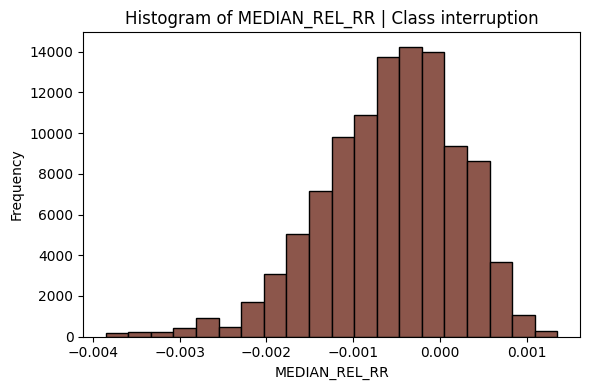

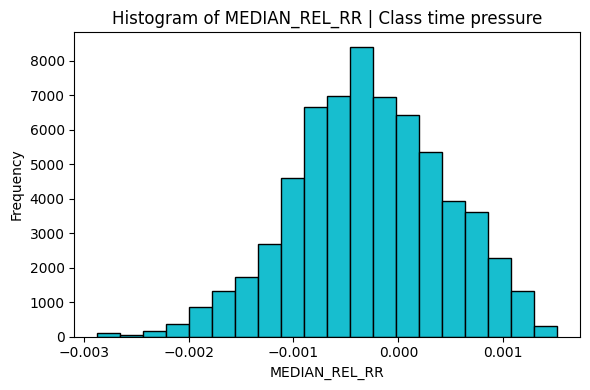

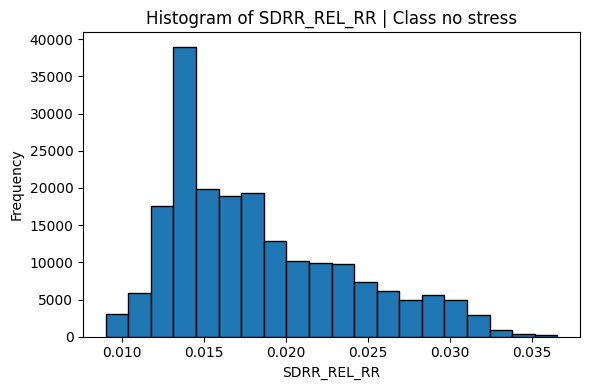

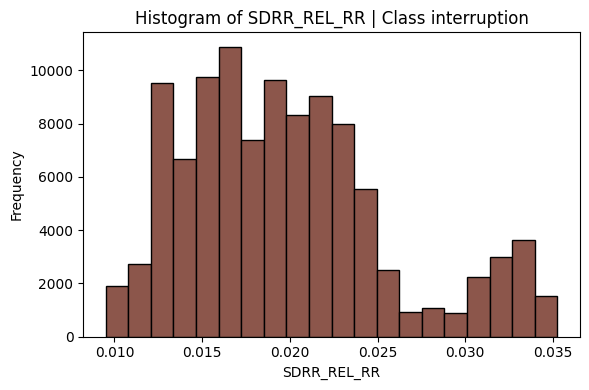

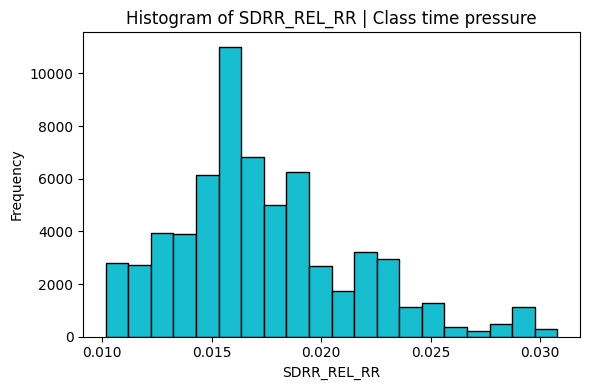

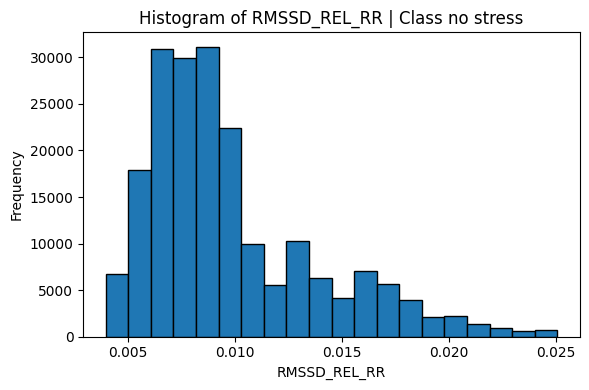

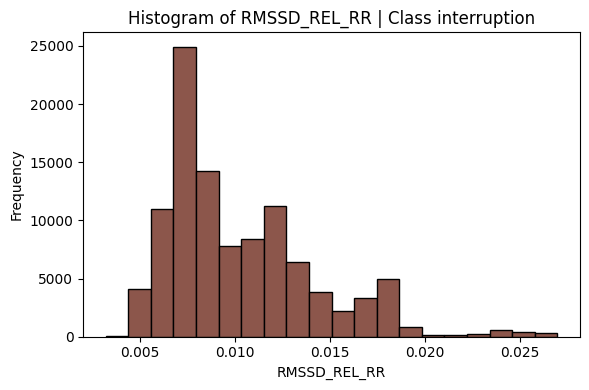

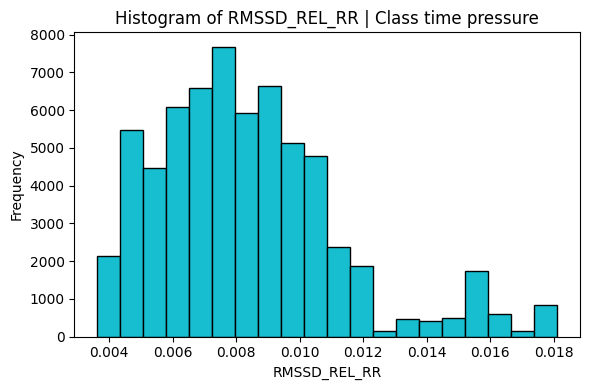

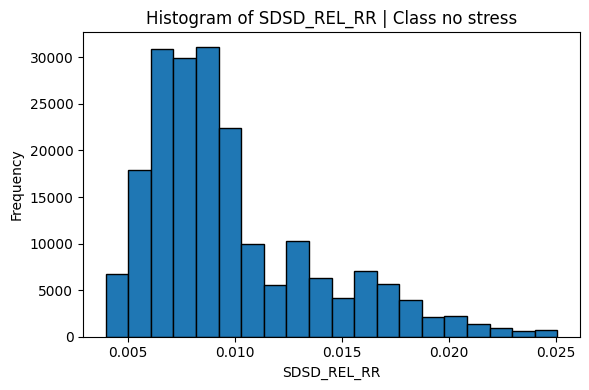

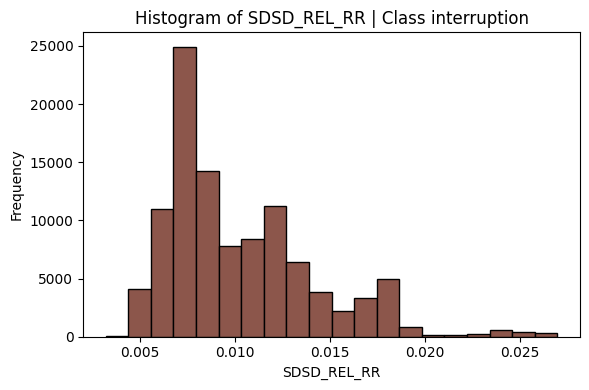

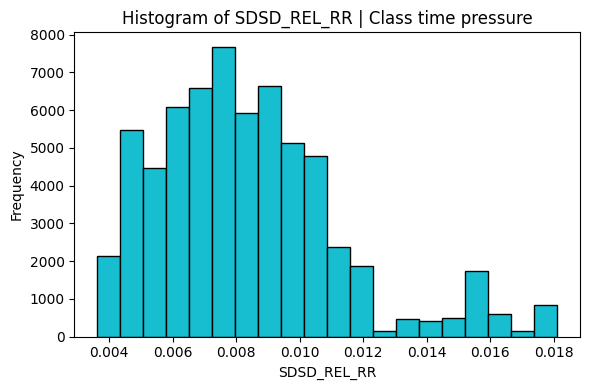

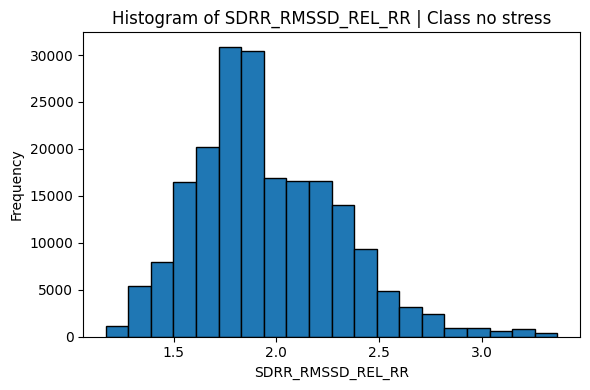

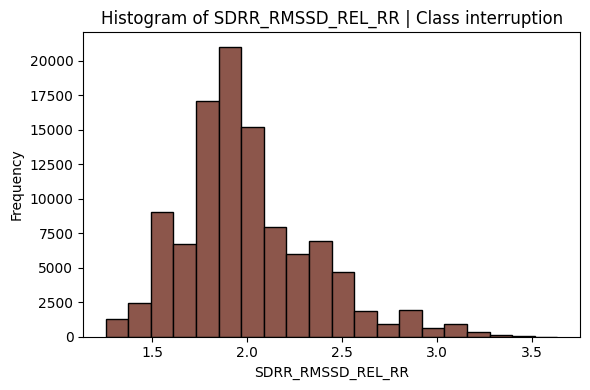

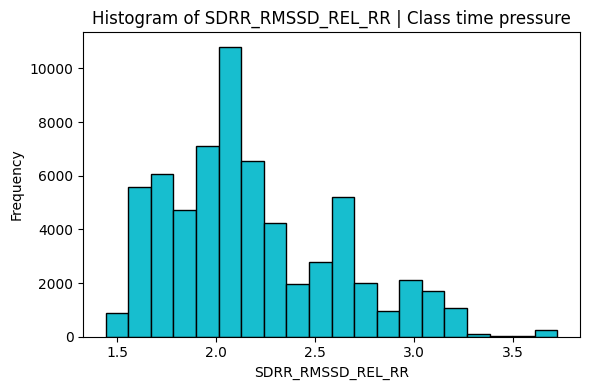

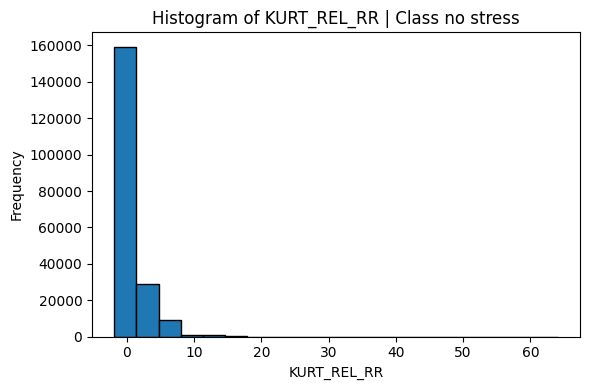

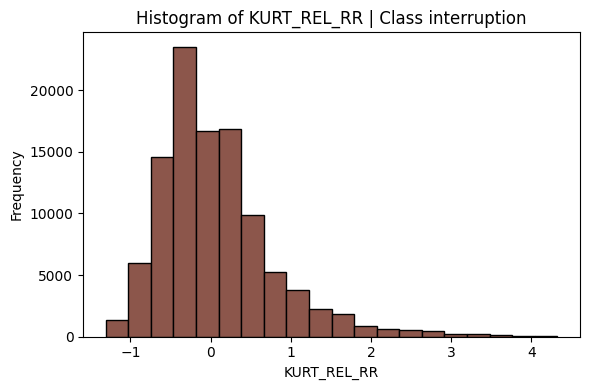

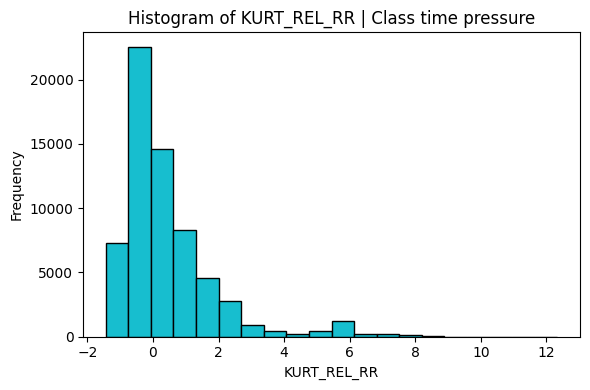

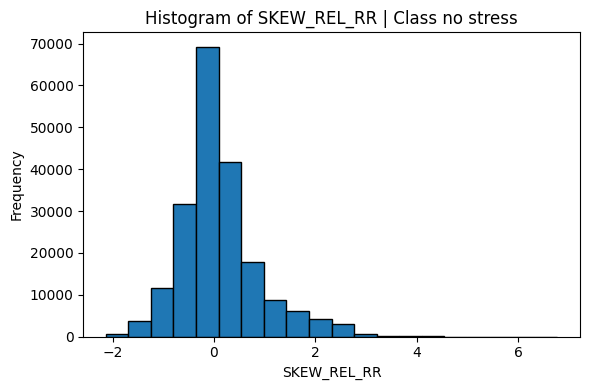

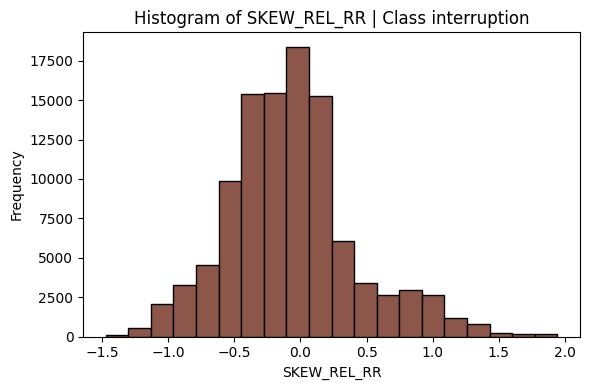

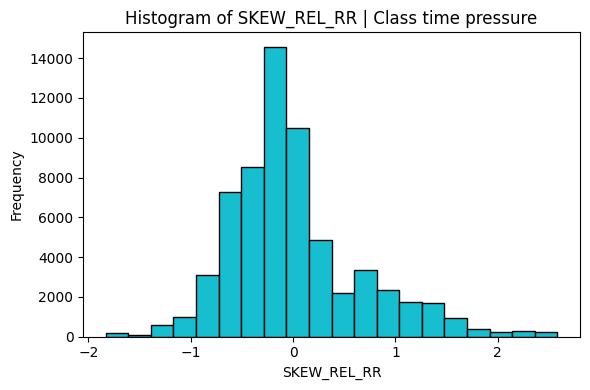

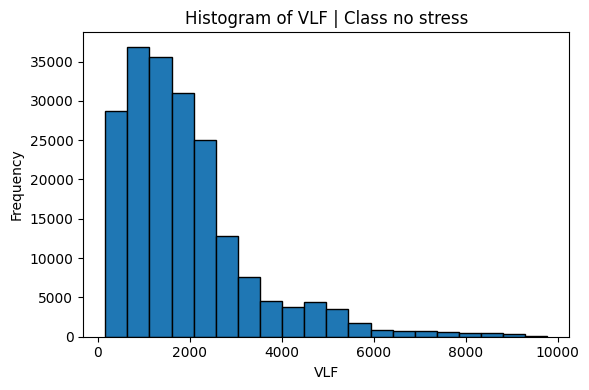

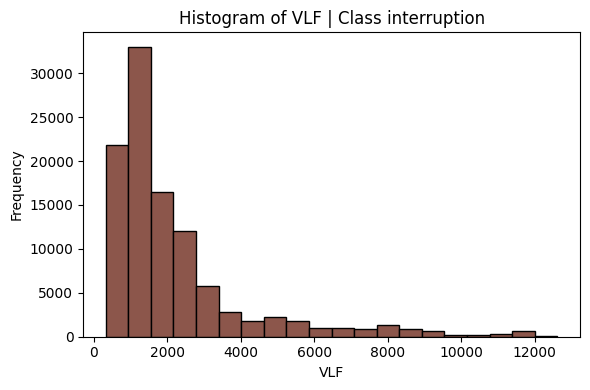

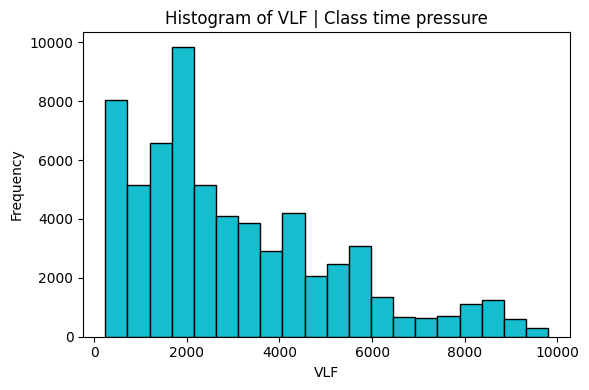

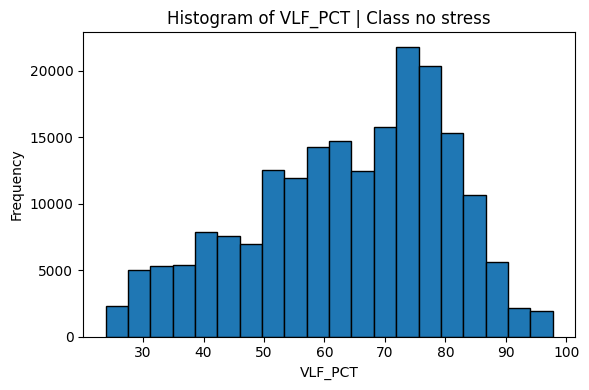

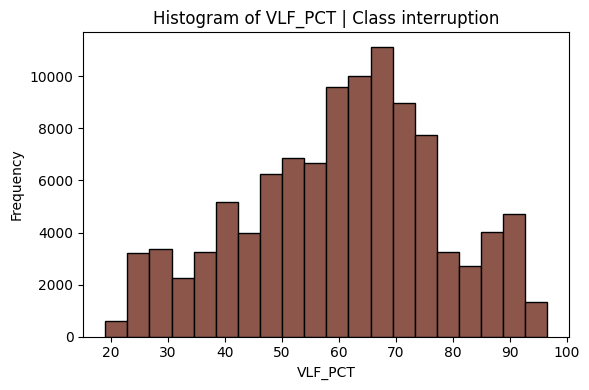

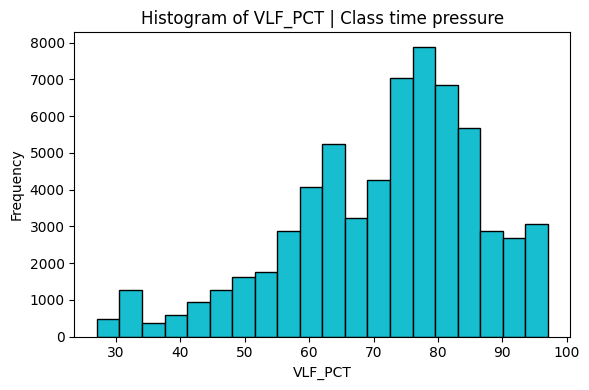

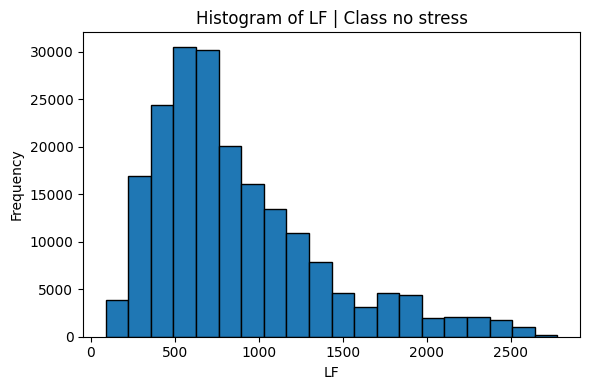

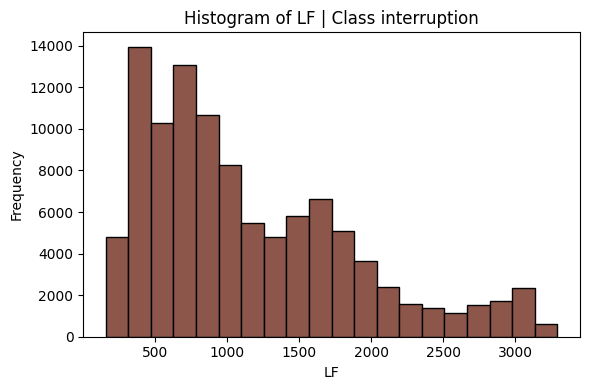

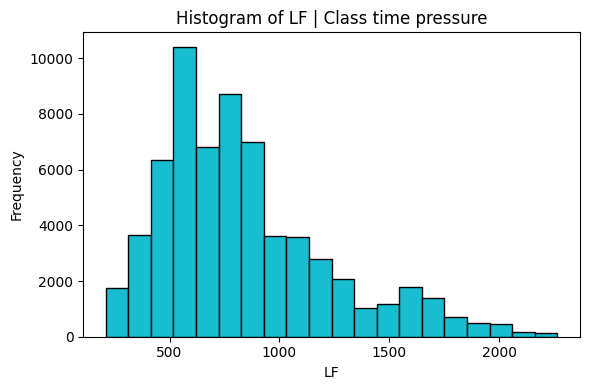

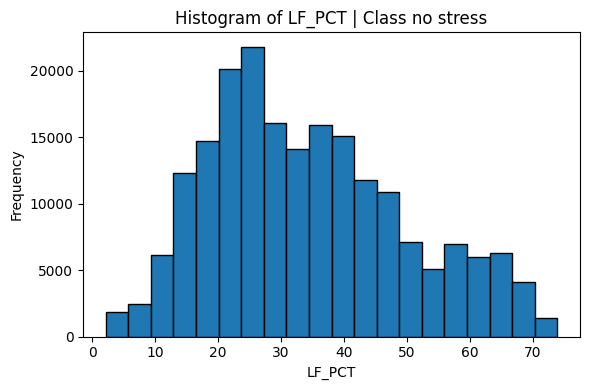

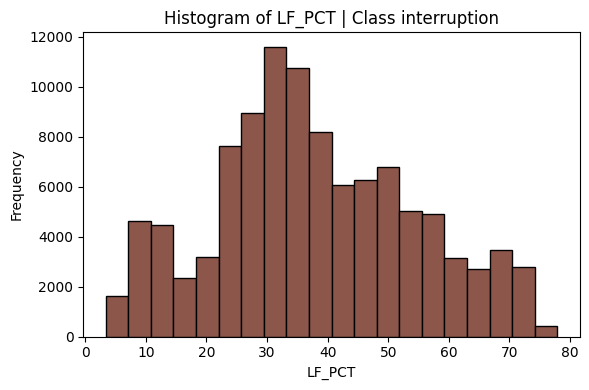

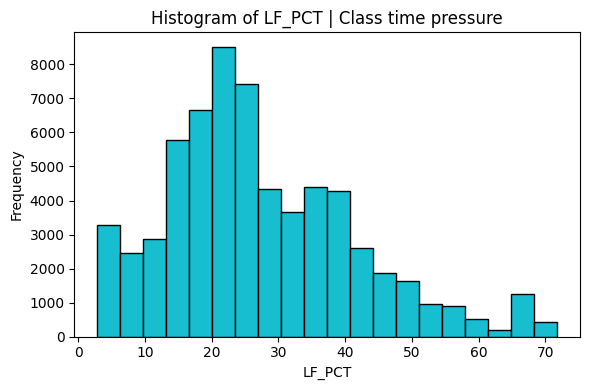

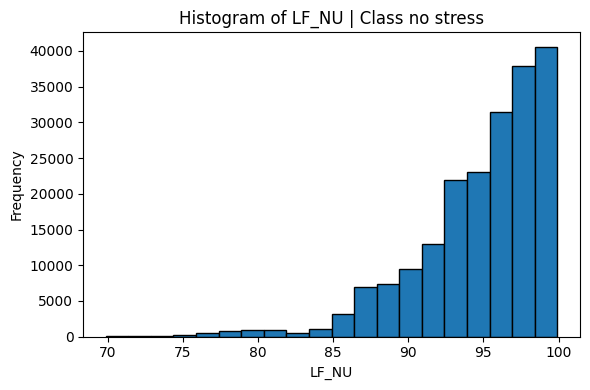

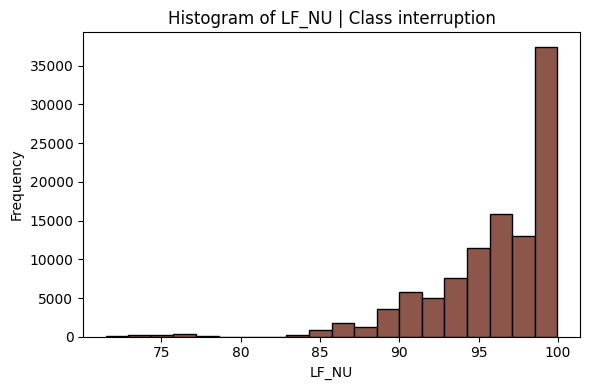

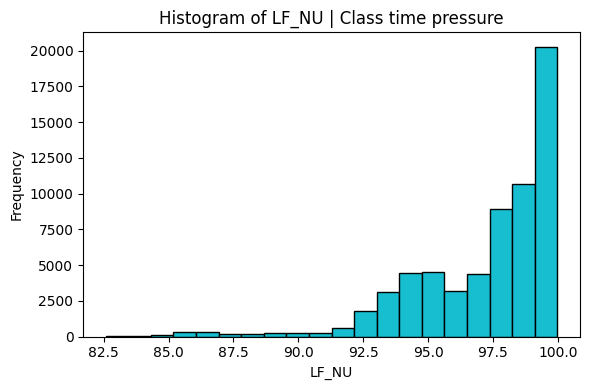

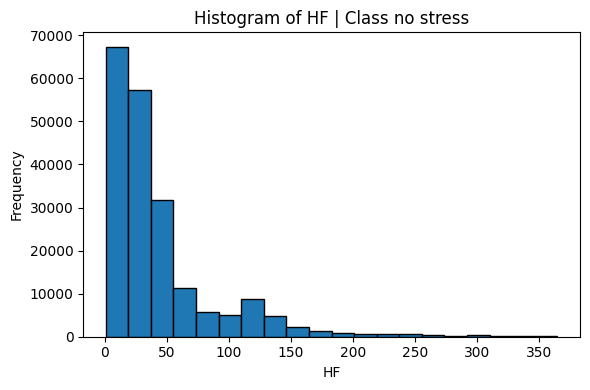

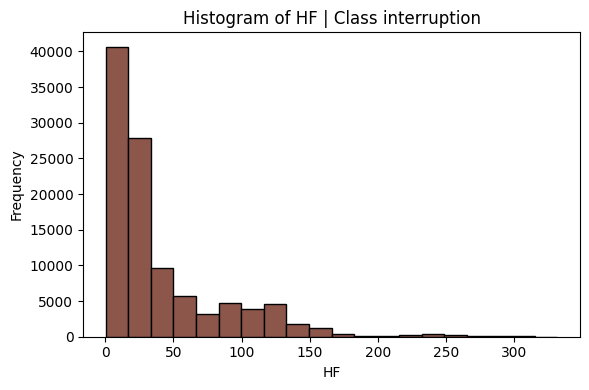

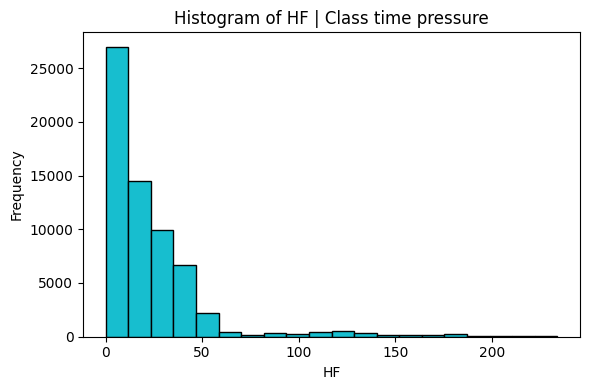

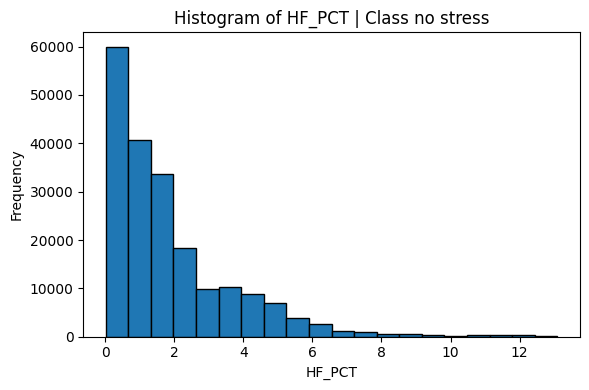

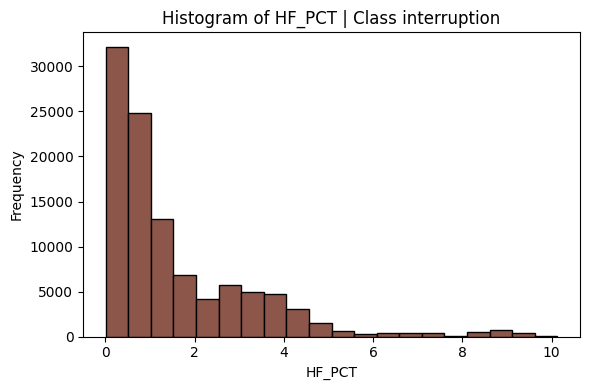

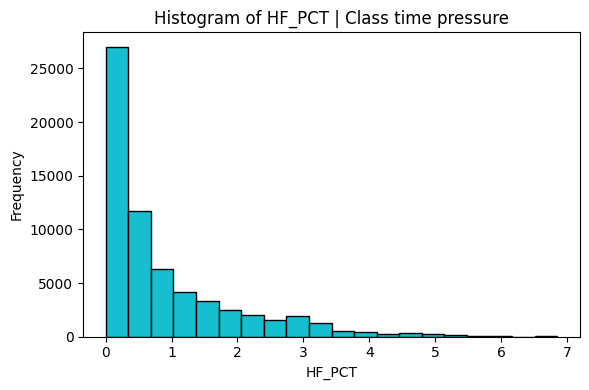

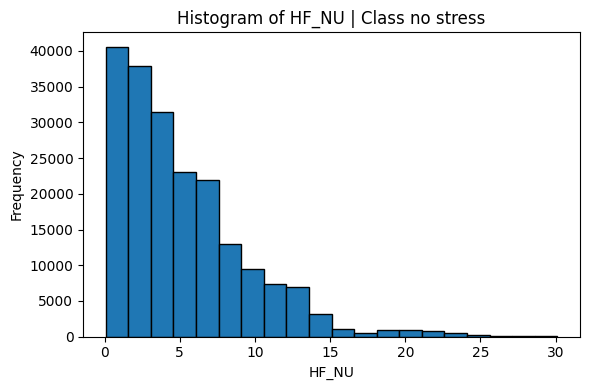

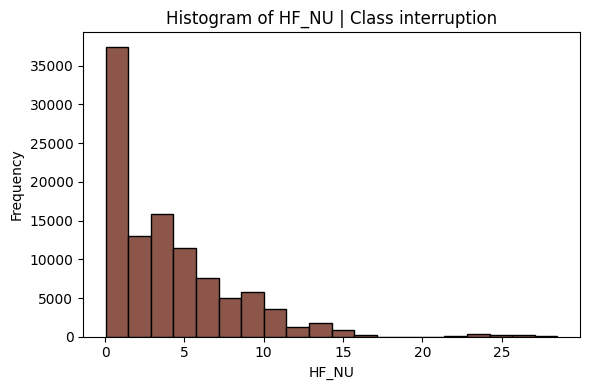

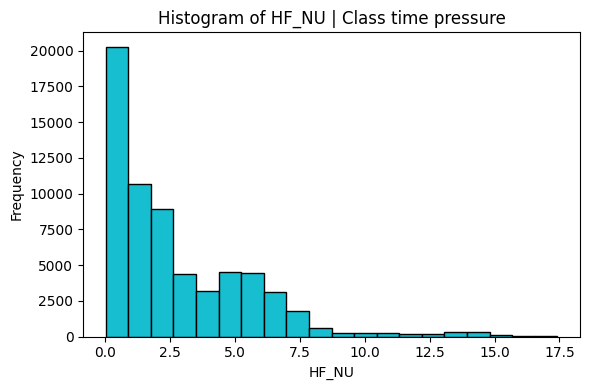

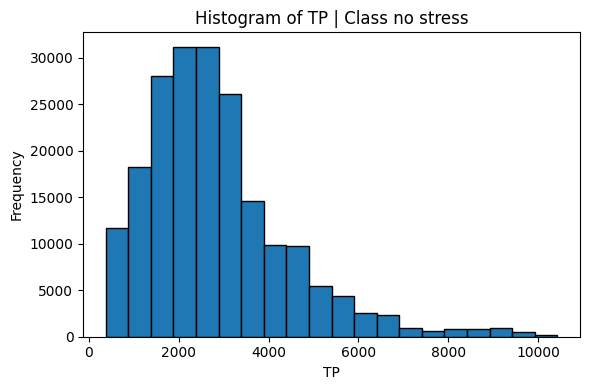

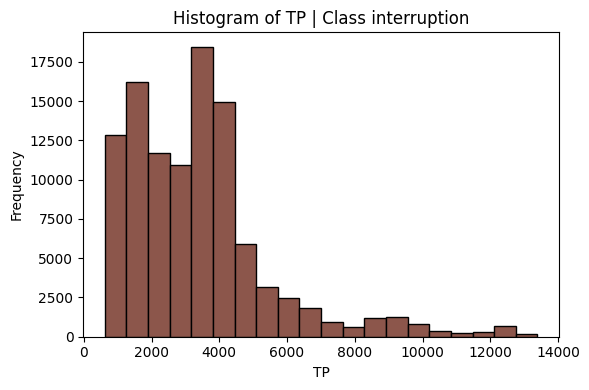

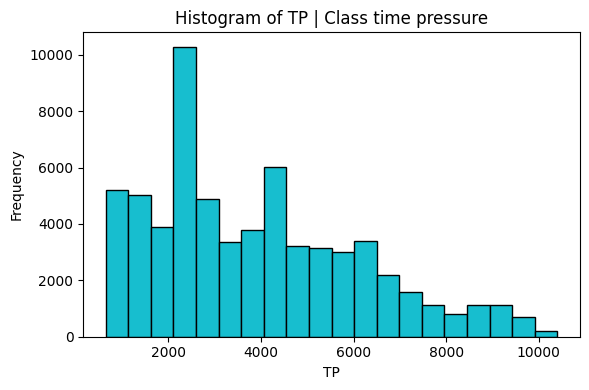

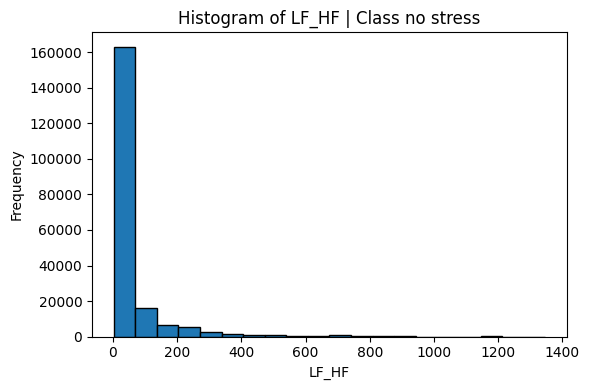

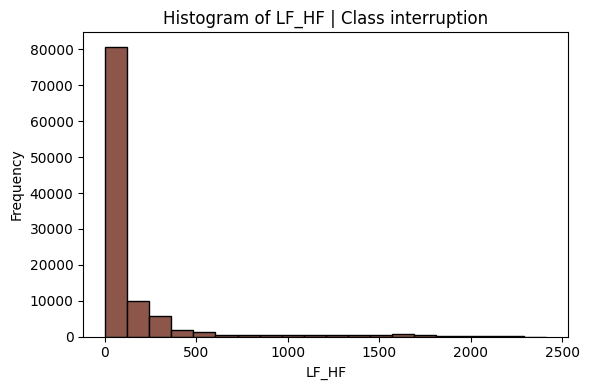

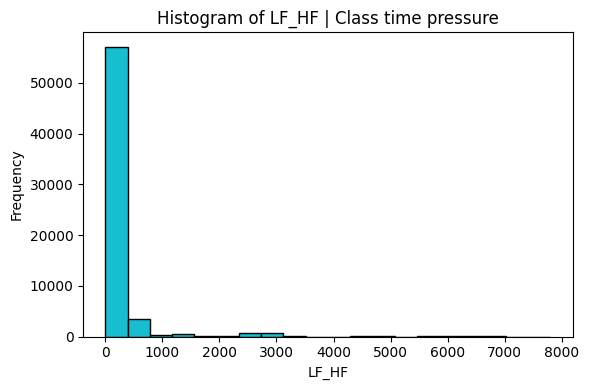

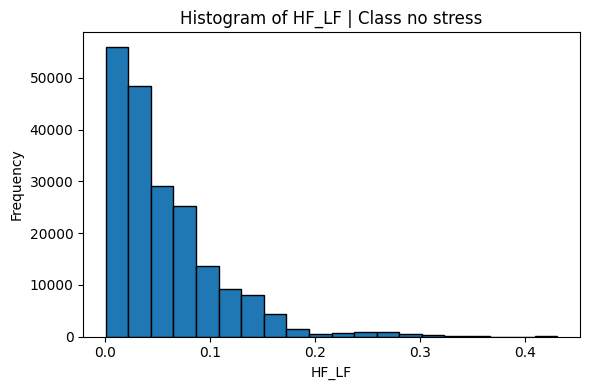

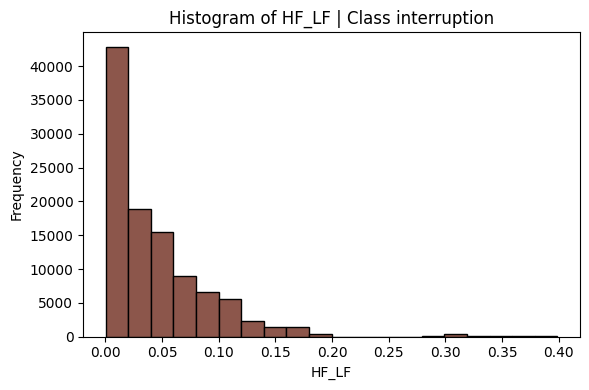

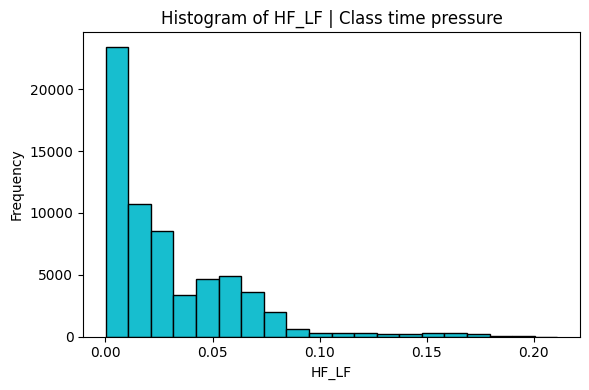

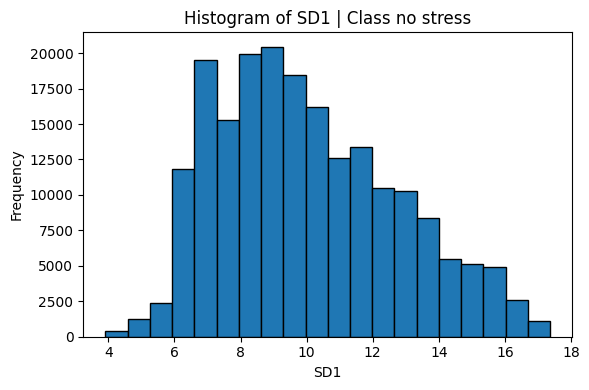

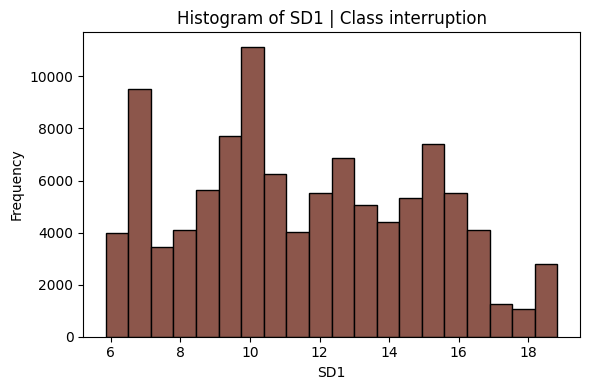

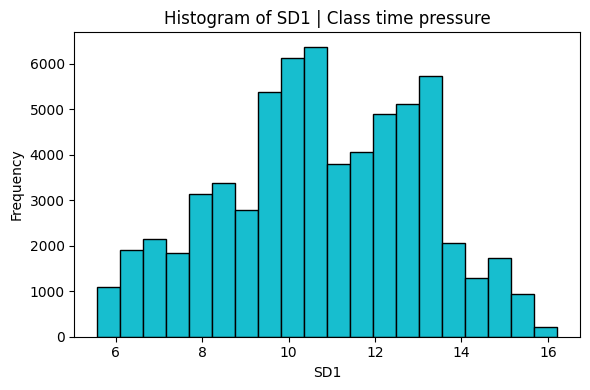

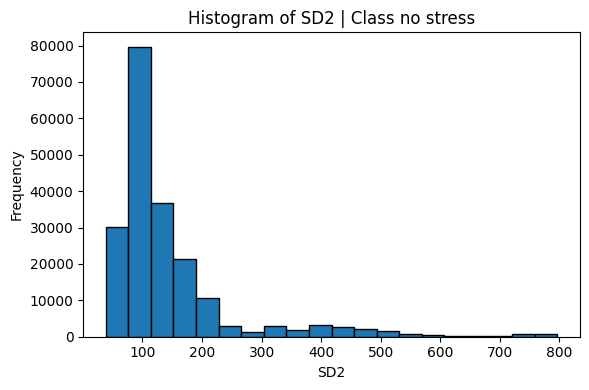

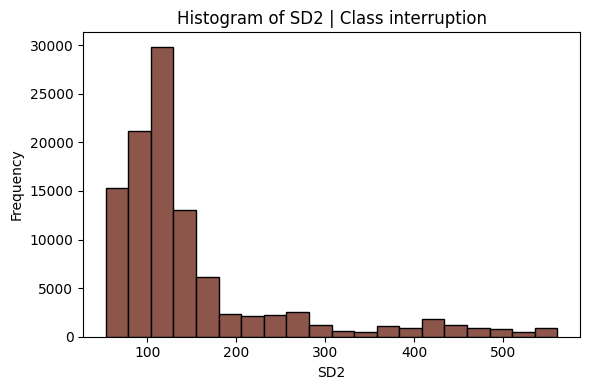

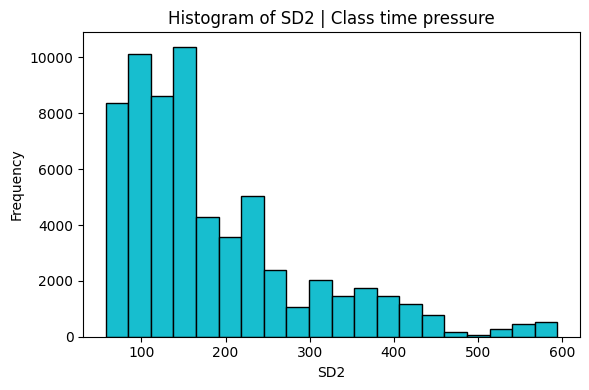

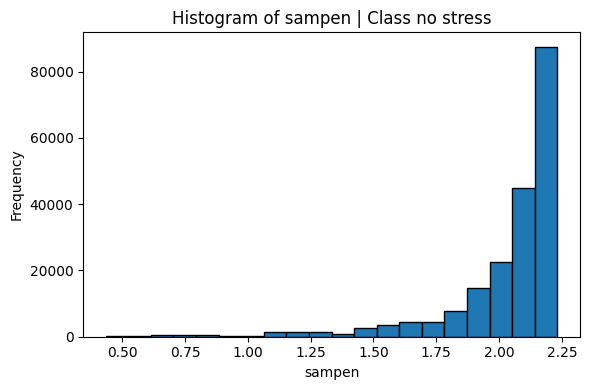

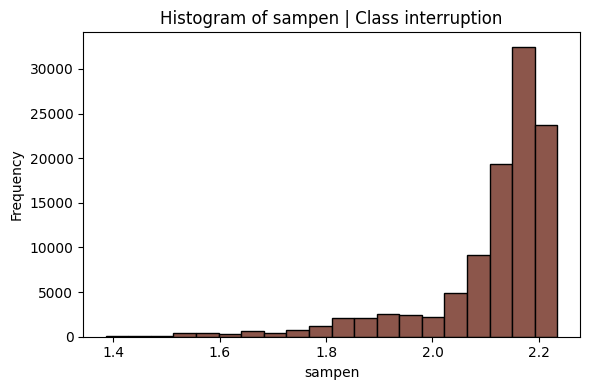

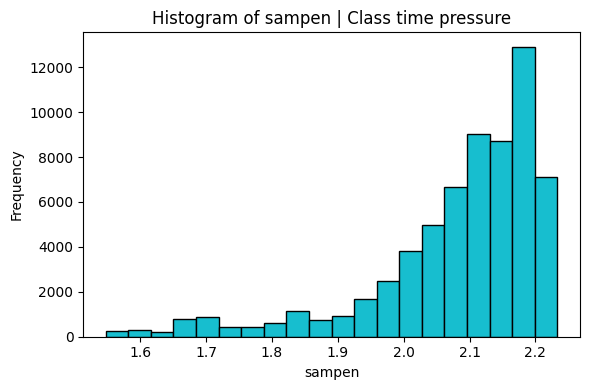

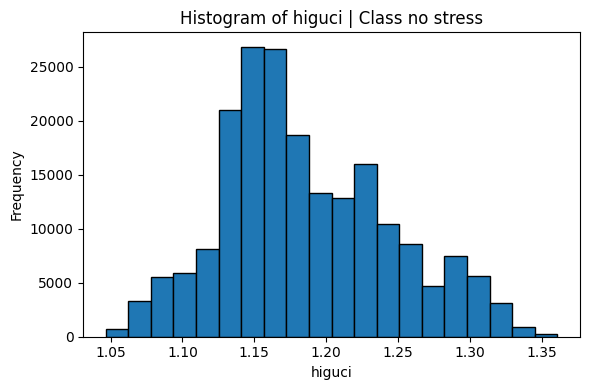

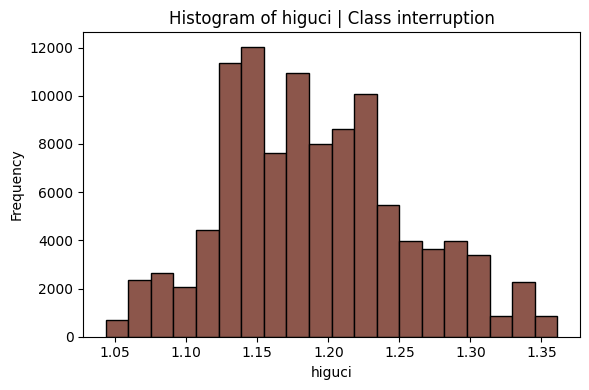

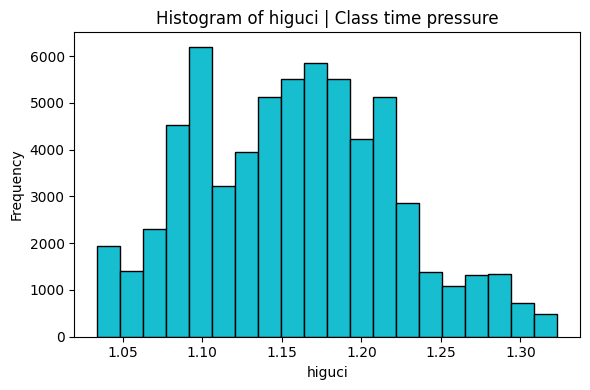

In [21]:
numeric_cols = df_train.columns.drop('condition')

# Get unique classes and assign a consistent color for each one
classes = df_train['condition'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(classes))) 
class_colors = dict(zip(classes, colors))

for d in numeric_cols:
    for l in classes:
        class_data = df_train[df_train['condition'] == l][d].dropna()

        plt.figure(figsize=(6, 4))
        plt.hist(
            class_data,
            bins=20,
            edgecolor='black',
            color=class_colors[l] 
        )
        plt.title(f"Histogram of {d} | Class {l}")
        plt.xlabel(d)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

In [22]:
for d in numeric_cols:
    for l in classes:
        # pull the rows that belong to class l
        values = df_train.loc[df_train['condition'] == l, d].dropna()

        if values.empty:          # guard against empty slice
            continue

        mean     = values.mean()
        std      = values.std(ddof=1)
        skewness = skew(values)

        print(f"{d}  |  class={l}:  μ={mean:.3f},  σ={std:.3f},  γ={skewness:.3f}")

MEAN_RR  |  class=no stress:  μ=812.930,  σ=109.995,  γ=0.842
MEAN_RR  |  class=interruption:  μ=861.561,  σ=120.312,  γ=0.688
MEAN_RR  |  class=time pressure:  μ=927.499,  σ=132.302,  γ=-0.059
MEDIAN_RR  |  class=no stress:  μ=807.264,  σ=121.966,  γ=1.662
MEDIAN_RR  |  class=interruption:  μ=857.207,  σ=122.472,  γ=0.591
MEDIAN_RR  |  class=time pressure:  μ=925.339,  σ=136.966,  γ=-0.106
SDRR  |  class=no stress:  μ=103.957,  σ=78.138,  γ=2.837
SDRR  |  class=interruption:  μ=106.478,  σ=72.237,  γ=2.153
SDRR  |  class=time pressure:  μ=130.925,  σ=77.965,  γ=1.411
RMSSD  |  class=no stress:  μ=14.175,  σ=3.826,  γ=0.474
RMSSD  |  class=interruption:  μ=16.364,  σ=4.708,  γ=0.183
RMSSD  |  class=time pressure:  μ=15.206,  σ=3.251,  γ=-0.132
SDSD  |  class=no stress:  μ=14.175,  σ=3.826,  γ=0.474
SDSD  |  class=interruption:  μ=16.364,  σ=4.708,  γ=0.184
SDSD  |  class=time pressure:  μ=15.206,  σ=3.250,  γ=-0.132
SDRR_RMSSD  |  class=no stress:  μ=7.492,  σ=5.799,  γ=4.110
SDRR_RMSS

In [23]:
results_unconditional = []

for d in numeric_cols:
    values = df_train[d].dropna()
    results_unconditional.append({
        "Predictor": d,
        "Mean": np.mean(values),
        "StdDev": np.std(values, ddof=1),
        "Skewness": skew(values)
    })

# Convert to DataFrame
df_unconditional = pd.DataFrame(results_unconditional)
print(df_unconditional)


            Predictor         Mean       StdDev  Skewness
0             MEAN_RR   846.650104   124.603984  0.647997
1           MEDIAN_RR   841.965890   132.321005  0.925510
2                SDRR   109.352531    77.117025  2.363779
3               RMSSD    14.977498     4.120766  0.399528
4                SDSD    14.976767     4.120768  0.399667
5          SDRR_RMSSD     7.396597     5.143834  3.707924
6                  HR    73.941824    10.337453  0.411719
7               pNN25     9.841143     8.195574  1.203109
8               pNN50     0.866001     0.990189  1.264132
9                KURT     0.523235     1.790348  5.722185
10               SKEW     0.041628     0.699522  1.223000
11        MEAN_REL_RR    -0.000002     0.000163  0.112795
12      MEDIAN_REL_RR    -0.000465     0.000868 -0.948006
13        SDRR_REL_RR     0.018571     0.005455  0.869539
14       RMSSD_REL_RR     0.009701     0.003897  1.258779
15        SDSD_REL_RR     0.009701     0.003897  1.258779
16  SDRR_RMSSD

In [28]:
results_conditional = []

for d in numeric_cols:
    for l in classes:
        class_data = df_train[df_train['condition'] == l][d].dropna()
        results_conditional.append({
            "Predictor": d,
            "Class": l,
            "Mean": np.mean(class_data),
            "StdDev": np.std(class_data, ddof=1),
            "Skewness": skew(class_data)
        })

# Convert to DataFrame
df_conditional = pd.DataFrame(results_conditional)
print(df_conditional)

     Predictor          Class        Mean      StdDev  Skewness
0      MEAN_RR      no stress  812.929826  109.994953  0.841529
1      MEAN_RR   interruption  861.560952  120.312234  0.687745
2      MEAN_RR  time pressure  927.499113  132.302495 -0.058943
3    MEDIAN_RR      no stress  807.264348  121.965645  1.661854
4    MEDIAN_RR   interruption  857.206536  122.472335  0.590617
..         ...            ...         ...         ...       ...
97      sampen   interruption    2.113072    0.125695 -2.216289
98      sampen  time pressure    2.082985    0.130583 -1.690519
99      higuci      no stress    1.185612    0.059157  0.425698
100     higuci   interruption    1.190632    0.064337  0.340311
101     higuci  time pressure    1.158234    0.062014  0.218575

[102 rows x 5 columns]


In [29]:
snr_results = []

for d in df_conditional['Predictor'].unique():
    subset = df_conditional[df_conditional['Predictor'] == d]
    
    # Mean difference across classes
    mean_diff = subset['Mean'].max() - subset['Mean'].min()
    
    # Average within-class standard deviation
    avg_std = subset['StdDev'].mean()
    
    # Signal-to-noise ratio
    snr = mean_diff / avg_std if avg_std > 0 else np.nan
    
    snr_results.append({
        "Predictor": d,
        "Mean Difference": mean_diff,
        "Average Std": avg_std,
        "SNR": snr
    })

df_snr = pd.DataFrame(snr_results).sort_values(by="SNR", ascending=False)
print(df_snr)

            Predictor  Mean Difference  Average Std       SNR
0             MEAN_RR       114.569287   120.869894  0.947873
1           MEDIAN_RR       118.074167   127.134794  0.928732
6                  HR         8.985252     9.823792  0.914642
20            VLF_PCT        11.180842    16.144451  0.692550
22             LF_PCT        10.516206    15.485208  0.679113
7               pNN25         5.041290     7.608272  0.662606
25             HF_PCT         0.981968     1.565054  0.627434
26              HF_NU         2.348242     3.742795  0.627403
23              LF_NU         2.348242     3.742795  0.627403
29              HF_LF         0.026907     0.044215  0.608553
16  SDRR_RMSSD_REL_RR         0.229514     0.377427  0.608101
19                VLF      1111.630201  1887.998260  0.588788
21                 LF       316.255826   537.173747  0.588740
30                SD1         1.548444     2.778538  0.557287
4                SDSD         2.189100     3.928135  0.557287
3       

In [24]:
#notice: dataset does not contain categorical features aside from 'condition'

In [25]:
#inference variable: HR

In [26]:
#normalize features (for training the model)